In [4]:
import cv2
import time
import os
import string

# Buka kamera
cap = cv2.VideoCapture(0)

# Periksa apakah kamera terbuka
if not cap.isOpened():
    print("Error: Kamera tidak dapat dibuka.")
    exit()

allTarget = [f for f in os.listdir('video2') if not f.startswith('.')]
path = "video2"

def get_latest_video_number(folder):
    """Mendapatkan nomor tertinggi dari filedeo video dalam folder."""
    folder_path = os.path.join(path, folder)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    videos = [int(f.split('.')[0]) for f in os.listdir(folder_path) if f.endswith('.mp4') and f.split('.')[0].isdigit()]
    return max(videos) + 1 if videos else 1

# Direktori awal untuk penyimpanan gambar
base_directory = "img"
current_subdir = "a"
current_directory = os.path.join(base_directory, current_subdir)
os.makedirs(current_directory, exist_ok=True)

# Inisialisasi target dan video
target_number = 0
display_text = f"Label : {allTarget[target_number]}"
video_count = get_latest_video_number(allTarget[target_number])
last_recorded_file = ""

print("Tekan 'c' untuk menangkap gambar.")
print("Tekan 's' untuk merekam video selama 5 detik.")
print("Tekan 't' untuk video selanjutnya.")
print("Tekan 'p' untuk video sebelumnya.")
print("Tekan 'd' untuk menghapus video saat ini.")
print("Tekan 'q' untuk keluar.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Gagal membaca frame.")
        break
    
    # Tambahkan teks ke frame
    display_text = f"Label: {allTarget[target_number]}"
    if last_recorded_file:
        display_text += f" | Last: {last_recorded_file}"
    
    cv2.putText(frame, display_text, (10, 50), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Tampilkan frame
    cv2.imshow("Tekan 'c' untuk capture, 's' untuk merekam, 't' untuk selanjutnya, 'p' untuk sebelumnya, 'd' untuk hapus, 'q' untuk keluar", frame)
    
    # Tangkap input keyboard
    key = cv2.waitKey(1) & 0xFF
    
    folder_path = os.path.join(path, allTarget[target_number])
    video_path = os.path.join(folder_path, f"{video_count}.mp4")
    if key == ord('n'):  # Pindah ke label (folder) berikutnya
        if target_number < len(allTarget) - 1:
            target_number += 1
        else:
            target_number = 0  # Jika sudah di akhir, kembali ke awal
        
        print(f"Label berikutnya: {allTarget[target_number]}")
        video_count = get_latest_video_number(allTarget[target_number])  # Reset nomor video
    
    if key == ord('m'):  # Pindah ke label (folder) sebelumnya
        if target_number > 0:
            target_number -= 1
        else:
            target_number = len(allTarget) - 1  # Jika di awal, kembali ke akhir
        
        print(f"Label sebelumnya: {allTarget[target_number]}")
        video_count = get_latest_video_number(allTarget[target_number])
    if key == ord('t'):  # Pindah ke video selanjutnya
        if os.path.exists(os.path.join(folder_path, f"{video_count + 1}.mp4")):
            video_count += 1
            print(f"Nama file berikutnya: {video_count}.mp4")
        else:
            print("Tidak ada video berikutnya.")
 
    elif key == ord('p'):  # Pindah ke video sebelumnya
        if video_count > 1 and os.path.exists(os.path.join(folder_path, f"{video_count - 1}.mp4")):
            video_count -= 1
            print(f"Nama file sebelumnya: {video_count}.mp4")
        else:
            print("Tidak ada video sebelumnya.")
    
    elif key == ord('c'):  # Ambil gambar
        filename = os.path.join(current_directory, f"img_{time.time()}.jpg")
        cv2.imwrite(filename, frame)
        print(f"Gambar telah disimpan sebagai {filename}")
    
    elif key == ord('s'):  # Rekam video
        video_count = get_latest_video_number(allTarget[target_number])  # Pastikan nomor file terbaru
        filename = os.path.join(folder_path, f"{video_count}.mp4")
        print(f"Merekam video selama 5 detik... Simpan sebagai {filename}")
        
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(filename, fourcc, 20.0, (640, 480))
        
        start_time = time.time()
        while time.time() - start_time < 2:
            ret, frame = cap.read()
            if not ret:
                print("Gagal membaca frame.")
                break
            
            elapsed_time = round(time.time() - start_time, 1)
            cv2.putText(frame, f"Recording: {elapsed_time:.1f}s", (10, 50), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
            
            out.write(frame)
            cv2.imshow("Merekam... Tekan 'q' untuk keluar", frame)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        
        out.release()
        print(f"Video telah disimpan sebagai {filename}")
        last_recorded_file = f"{video_count}.mp4"
    
    elif key == ord('d'):  # Hapus video saat ini
        if os.path.exists(video_path):
            os.remove(video_path)
            print(f"File {video_path} telah dihapus.")
            video_count = get_latest_video_number(allTarget[target_number])  # Update nomor terbaru
        else:
            print("File tidak ditemukan.")
    
    elif key == ord('q'):  # Keluar
        print("Menutup program...")
        break

# Tutup kamera dan jendela
cap.release()
cv2.destroyAllWindows()

Tekan 'c' untuk menangkap gambar.
Tekan 's' untuk merekam video selama 5 detik.
Tekan 't' untuk video selanjutnya.
Tekan 'p' untuk video sebelumnya.
Tekan 'd' untuk menghapus video saat ini.
Tekan 'q' untuk keluar.
Menutup program...


In [5]:

import numpy as np

arr = np.array([[2, 3, 5, 7, 8, 5, 4, 6],
                [3,5,6,7,8,6,4,3]])
length = arr.shape[1]
half = length // 2

# Salin array agar tidak mengubah aslinya
result = arr.copy()

# Kurangi bagian pertama dengan 1
result[:, :half] -= 1

# Kurangi bagian kedua dengan 10
result[:, half:] -= 10

print(result)

[[ 1  2  4  6 -2 -5 -6 -4]
 [ 2  4  5  6 -2 -4 -6 -7]]


In [14]:
z=list('abcdefghijklmnopqrstuvwxyz')
z[len(z)-1]

'z'

In [15]:
import os

# List huruf dari a sampai z
allTarget2 = list('abcdefghijklmnopqrstuvwxyz')

# Base path-nya adalah 'img/'
base_path = 'img'

# Pastikan folder 'img/' ada
os.makedirs(base_path, exist_ok=True)

# Buat folder a-z di dalam 'img/'
for folder in allTarget2:
    full_path = os.path.join(base_path, folder)
    os.makedirs(full_path, exist_ok=True)
    print(f'Folder {folder} siap di: {full_path}')


Folder a siap di: img/a
Folder b siap di: img/b
Folder c siap di: img/c
Folder d siap di: img/d
Folder e siap di: img/e
Folder f siap di: img/f
Folder g siap di: img/g
Folder h siap di: img/h
Folder i siap di: img/i
Folder j siap di: img/j
Folder k siap di: img/k
Folder l siap di: img/l
Folder m siap di: img/m
Folder n siap di: img/n
Folder o siap di: img/o
Folder p siap di: img/p
Folder q siap di: img/q
Folder r siap di: img/r
Folder s siap di: img/s
Folder t siap di: img/t
Folder u siap di: img/u
Folder v siap di: img/v
Folder w siap di: img/w
Folder x siap di: img/x
Folder y siap di: img/y
Folder z siap di: img/z


In [3]:
import cv2
import time
import os
import string
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# Buka kamera
cap = cv2.VideoCapture(0)

# Pastikan model hand_landmarker sudah disiapkan dengan benar
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=2,
    running_mode=vision.RunningMode.IMAGE  # Gunakan mode gambar
)
detector = vision.HandLandmarker.create_from_options(options)

# Periksa apakah kamera terbuka
if not cap.isOpened():
    print("Error: Kamera tidak dapat dibuka.")
    exit()

allTarget = [f for f in os.listdir('video2') if not f.startswith('.')]
path = "video2"

def get_latest_video_number(folder):
    """Mendapatkan nomor tertinggi dari file video dalam folder."""
    folder_path = os.path.join(path, folder)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    videos = [int(f.split('.')[0]) for f in os.listdir(folder_path) if f.endswith('.mp4') and f.split('.')[0].isdigit()]
    return max(videos) + 1 if videos else 1

# Direktori awal untuk penyimpanan gambar
base_directory = "img"
allTarget2 = list('abcdefghijklmnopqrstuvwxyz')
imgLabel = 0
current_directory = os.path.join(base_directory, allTarget2[0])
os.makedirs(current_directory, exist_ok=True)
target_number = 0

# Inisialisasi target dan video

numImg = 1
display_text = f"Label : {allTarget[target_number]}"
video_count = get_latest_video_number(allTarget[target_number])
last_recorded_file = ""

print("Tekan 'c' untuk menangkap gambar.")
print("Tekan 's' untuk merekam video selama 5 detik.")
print("Tekan 't' untuk video selanjutnya.")
print("Tekan 'p' untuk video sebelumnya.")
print("Tekan 'd' untuk menghapus video saat ini.")
print("Tekan 'q' untuk keluar.")

# Fungsi untuk deteksi hand landmark
def count_hand_landmarks(frame):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)

    # Deteksi tangan
    detection_result = detector.detect(mp_image)
    
    detected_landmarks = 0  # Inisialisasi variabel untuk menghitung landmarks
    
    if detection_result and detection_result.hand_landmarks:
        # Perhitungkan jumlah hand landmarks yang terdeteksi (satu tangan memiliki 21 landmarks)
        detected_landmarks = len(detection_result.hand_landmarks)
    
    return detected_landmarks
def last_img(current_directory, base_directory, allTarget2, imgLabel):
    current_directory = os.path.join(base_directory, allTarget2[imgLabel])
    try:
        jpg_files = [f for f in os.listdir(current_directory) if f.endswith('.jpg')]
        sorted_files = [f.split('.')[0] for f in sorted(jpg_files, key=lambda x: int(x.split('.')[0]))]

        last_file = sorted_files[-1] if sorted_files else "0"
        return int(last_file) + 1
    except Exception as e:
        print(f"Error: {e}")
        return 1  # Jika tidak ada gambar, mulai dari 1
numImg= last_img(current_directory,base_directory,allTarget2,imgLabel)
while True:
    
    ret, frame = cap.read()
    if not ret:
        print("Gagal membaca frame.")
        break
    
    # Tambahkan teks ke frame
    display_text = f"Label: {allTarget[target_number]}"
    if last_recorded_file:
        display_text += f" | Last: {last_recorded_file}"
    
    cv2.putText(frame, display_text, (10, 50), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Tampilkan frame
    cv2.imshow("Tekan 'c' untuk capture, 's' untuk merekam, 't' untuk selanjutnya, 'p' untuk sebelumnya, 'd' untuk hapus, 'q' untuk keluar", frame)
    
    # Tangkap input keyboard
    key = cv2.waitKey(1) & 0xFF
    
    folder_path = os.path.join(path, allTarget[target_number])
    video_path = os.path.join(folder_path, f"{video_count}.mp4")
    
    if key == ord('n'):  # Pindah ke label (folder) berikutnya
        if target_number < len(allTarget) - 1:
            target_number += 1
        else:
            target_number = 0  # Jika sudah di akhir, kembali ke awal
        
        print(f"Label berikutnya: {allTarget[target_number]}")
        video_count = get_latest_video_number(allTarget[target_number])  # Reset nomor video
    
    if key == ord('m'):  # Pindah ke label (folder) sebelumnya
        if target_number > 0:
            target_number -= 1
        else:
            target_number = len(allTarget) - 1  # Jika di awal, kembali ke akhir
        
        print(f"Label sebelumnya: {allTarget[target_number]}")
        video_count = get_latest_video_number(allTarget[target_number])
    
    if key == ord('t'):  # Pindah ke video selanjutnya
        if os.path.exists(os.path.join(folder_path, f"{video_count + 1}.mp4")):
            video_count += 1
            print(f"Nama file berikutnya: {video_count}.mp4")
        else:
            print("Tidak ada video berikutnya.")
 
    elif key == ord('p'):  # Pindah ke video sebelumnya
        if video_count > 1 and os.path.exists(os.path.join(folder_path, f"{video_count - 1}.mp4")):
            video_count -= 1
            print(f"Nama file sebelumnya: {video_count}.mp4")
        else:
            print("Tidak ada video sebelumnya.")
    
    elif key == ord('c'):  # Ambil gambar
        numImg= last_img(current_directory,base_directory,allTarget2,imgLabel)
        filename = os.path.join(current_directory, f"{numImg}.jpg")
        cv2.imwrite(filename, frame)
        numImg += 1
        print(f"Gambar telah disimpan sebagai {filename}")
    elif key == ord('b'):
        imgLabel+=1
        if imgLabel >(len(allTarget2)-1):
            imgLabel = 0
        current_directory = os.path.join(base_directory, allTarget2[imgLabel])
 
        print(f"LABEL = {allTarget2[imgLabel]}")
    elif key == ord('h'):  # Ambil gambar
        imgLabel-=1
        if imgLabel <0:
            imgLabel = len(allTarget2)-1
        current_directory = os.path.join(base_directory, allTarget2[imgLabel])
 
        print(f"LABEL = {allTarget2[imgLabel]}")
    
    elif key == ord('s'):  # Rekam video
        video_count = get_latest_video_number(allTarget[target_number])  # Pastikan nomor file terbaru
        filename = os.path.join(folder_path, f"{video_count}.mp4")
        print(f"Merekam video selama 5 detik... Simpan sebagai {filename}")
        
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(filename, fourcc, 20.0, (640, 480))
        
        start_time = time.time()
        hand_landmark_count = 0
        
        while time.time() - start_time < 2.2:  # Rekam selama 5 detik
            ret, frame = cap.read()
            if not ret:
                print("Gagal membaca frame.")
                break
            
            # Deteksi jumlah hand landmarks
            hand_landmark_count += count_hand_landmarks(frame)
            
            elapsed_time = round(time.time() - start_time, 1)
            cv2.putText(frame, f"Recording: {elapsed_time:.1f}s", (10, 50), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
            
            out.write(frame)
            cv2.imshow("Merekam... Tekan 'q' untuk keluar", frame)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        
        out.release()
        print(hand_landmark_count)
        # Jika jumlah hand landmarks kurang dari 50, batalkan penyimpanan video
        if hand_landmark_count < 50:
            os.remove(filename)
            print(f"Video tidak disimpan karena jumlah hand landmarks kurang dari 50.")
        else:
            print(f"Video telah disimpan sebagai {filename}")
            last_recorded_file = f"{video_count}.mp4"
    
    elif key == ord('d'):  # Hapus video saat ini
        if os.path.exists(video_path):
            os.remove(video_path)
            print(f"File {video_path} telah dihapus.")
            video_count = get_latest_video_number(allTarget[target_number])  # Update nomor terbaru
        else:
            print("File tidak ditemukan.")
    
    elif key == ord('q'):  # Keluar
        print("Menutup program...")
        break

# Tutup kamera dan jendela
cap.release()
cv2.destroyAllWindows()


I0000 00:00:1749020784.220227   20111 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1749020784.223550   20441 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
W0000 00:00:1749020784.268468   20442 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1749020784.302226   20456 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Tekan 'c' untuk menangkap gambar.
Tekan 's' untuk merekam video selama 5 detik.
Tekan 't' untuk video selanjutnya.
Tekan 'p' untuk video sebelumnya.
Tekan 'd' untuk menghapus video saat ini.
Tekan 'q' untuk keluar.
Menutup program...


In [ ]:

    

# Mengambil nomor yang ada pada nama file, asumsikan formatnya "nomor_gambar.jpg"
# Misal: '1.jpg', '2.jpg', '10.jpg' dan seterusnya
# Memperbaiki kode untuk mengekstrak nomor dari nama file dan mengurutkannya


eerrr


In [ ]:
import cv2
import time
import os
import string
[f for f in os.listdir('video2') if not f.startswith('.')   ]

['paham', 'percaya', 'tidak', 'kita']

In [ ]:
g = sorted([f for f in os.listdir('video2/paham') if not f.startswith('.') ],key=lambda x: int(x.split('.')[0]))

for ga in g:
    print(ga.split('.')[0])

1


In [ ]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# Warna dan ukuran font untuk teks tampilan
FONT_SIZE = 0.5
FONT_THICKNESS = 1
TEXT_COLOR = (0, 255, 0)  # Warna hijau untuk teks koordinat

# Buka video dari kamera
cap_video = cv2.VideoCapture(0)

# Pastikan video dapat dibuka
if not cap_video.isOpened():
    print("Gagal membuka video.")
    exit()

# STEP 2: Buat objek FaceDetector dengan model BlazeFace
base_options = python.BaseOptions(model_asset_path='blaze_face_short_range.tflite')
options = vision.FaceDetectorOptions(base_options=base_options)
detector = vision.FaceDetector.create_from_options(options)

print("Menampilkan video dengan deteksi wajah menggunakan BlazeFace. Tekan 's' untuk pause, 'q' untuk keluar.")

# Variabel global untuk status video (berjalan atau pause)
paused = False

# Buat jendela sebelum loop untuk menghindari error OpenCV
cv2.namedWindow("Deteksi Wajah - BlazeFace")

while True:
    if not paused:
        ret, frame = cap_video.read()

        if not ret:
            print("Gagal membaca frame.")
            break

        # Konversi frame ke RGB untuk MediaPipe
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Konversi frame menjadi format Image MediaPipe
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)

        # Deteksi wajah menggunakan BlazeFace
        detection_result = detector.detect(mp_image)

        if detection_result and detection_result.detections:
            for detection in detection_result.detections:
                bbox = detection.bounding_box
                x1, y1 = int(bbox.origin_x), int(bbox.origin_y)
                x2, y2 = int(bbox.origin_x + bbox.width), int(bbox.origin_y + bbox.height)

                # Gambar bounding box di sekitar wajah
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

                # Menampilkan koordinat wajah
                cv2.putText(frame, f"X:{x1}, Y:{y1}", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

    # Tampilkan video dengan deteksi wajah
    cv2.imshow("Deteksi Wajah - BlazeFace", frame)

    # Tangkap input keyboard
    key = cv2.waitKey(25) & 0xFF
    if key == ord('q'):  # Tekan 'q' untuk keluar
        break
    elif key == ord('s'):  # Tekan 's' untuk pause/unpause video
        paused = not paused
        if paused:
            print("Video dijeda. Tekan 's' untuk melanjutkan.")
        else:
            print("Melanjutkan video...")

# Tutup video dan jendela
cap_video.release()
cv2.destroyAllWindows()


I0000 00:00:1746948021.640055   48926 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1746948021.643886   49311 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
W0000 00:00:1746948021.654356   49312 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Menampilkan video dengan deteksi wajah menggunakan BlazeFace. Tekan 's' untuk pause, 'q' untuk keluar.


In [2]:
import os
MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
base_dir = 'img'

# Loop semua subfolder dalam folder 'img'
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)

    if os.path.isdir(folder_path):
        # Ambil hanya file .jpg yang namanya angka
        jpg_files = [
            f for f in os.listdir(folder_path)
            if f.endswith('.jpg') and os.path.splitext(f)[0].isdigit()
        ]

        # Urutkan berdasarkan angkanya
        jpg_files.sort(key=lambda x: int(os.path.splitext(x)[0]))

        # Rename langsung ke 1.jpg, 2.jpg, dst
        for idx, old_name in enumerate(jpg_files, start=1):
            old_path = os.path.join(folder_path, old_name)
            new_name = f"{idx}.jpg"
            new_path = os.path.join(folder_path, new_name)

            if old_name != new_name:
                os.rename(old_path, new_path)

print("Berhasil merapikan nama file JPG yang berupa angka, jadi berurutan tanpa loncatan.")



Berhasil merapikan nama file JPG yang berupa angka, jadi berurutan tanpa loncatan.


In [4]:
import pandas as pd
pd.read_csv(f'csv_separated/dinamic/trim/paham.csv')

,Xl0,Xl1,Xl2,Xl3,Xl4,Xl5,Xl6,Xl7,Xl8,Xl9,...,Yh1,Xh2,Yh2,Xh3,Yh3,Xh4,Yh4,timestep,sequence,Label
0,0.214865,0.223305,0.217363,0.228137,0.236343,0.135660,0.100009,0.072578,0.049061,0.129044,...,141,477,141,313,305,477,305,0,0,paham
1,0.213314,0.221524,0.215514,0.225702,0.237474,0.132439,0.093544,0.064084,0.039449,0.126710,...,141,477,141,312,305,477,305,1,0,paham
2,0.207518,0.219430,0.213709,0.224104,0.235394,0.128507,0.087646,0.055328,0.027923,0.125667,...,142,477,142,313,306,477,306,2,0,paham
3,0.216886,0.226230,0.220651,0.230964,0.244108,0.137514,0.096697,0.068332,0.044265,0.132728,...,144,476,144,313,307,476,307,3,0,paham
4,0.234508,0.249633,0.245176,0.252847,0.264021,0.158539,0.135897,0.118423,0.103199,0.152824,...,141,474,141,308,306,474,306,4,0,paham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,0.520362,0.572351,0.584070,0.590238,0.598528,0.531357,0.577771,0.608035,0.630007,0.525766,...,211,511,211,367,354,511,354,15,110,paham
2216,0.517209,0.569582,0.582676,0.590076,0.599790,0.530497,0.576862,0.606689,0.628555,0.523892,...,208,511,208,366,353,511,353,16,110,paham
2217,0.516218,0.569224,0.582614,0.592101,0.600970,0.524387,0.570026,0.600672,0.624002,0.518228,...,205,508,205,359,355,508,355,17,110,paham
2218,0.508562,0.560747,0.574421,0.583974,0.594273,0.520408,0.566946,0.597086,0.619685,0.514042,...,203,506,203,358,351,506,351,18,110,paham


## COLLECTING DATA AND DIRECT TO CSV FILE

In [1]:

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
def draw_landmarks_on_image(rgb_image, detection_result):
    hand_landmarks_list = detection_result.hand_landmarks
    handedness_list = detection_result.handedness
    annotated_image = np.copy(rgb_image)
    
    # Loop through the detected hands to visualize.
    for idx in range(len(hand_landmarks_list)):
        hand_landmarks = hand_landmarks_list[idx]
        handedness = handedness_list[idx]
        
        # Draw the hand landmarks.
        hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        hand_landmarks_proto.landmark.extend([
          landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
        ])
        solutions.drawing_utils.draw_landmarks(
          annotated_image,
          hand_landmarks_proto,
          solutions.hands.HAND_CONNECTIONS,
          solutions.drawing_styles.get_default_hand_landmarks_style(),
          solutions.drawing_styles.get_default_hand_connections_style())
        
        # Get the top left corner of the detected hand's bounding box.
        height, width, _ = annotated_image.shape
        x_coordinates = [landmark.x for landmark in hand_landmarks]
        y_coordinates = [landmark.y for landmark in hand_landmarks]
        text_x = int(min(x_coordinates) * width)
        text_y = int(min(y_coordinates) * height) - MARGIN
    return annotated_image


2025-09-26 15:51:40.388108: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-26 15:51:40.398603: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758876700.410286   13386 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758876700.413735   13386 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758876700.422555   13386 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [7]:
21>=20

True

## COLLECTING DATA WITH KELAPA

In [ ]:
import cv2
import time
import os
from mediapipe.framework.formats import landmark_pb2
import string
import numpy as np
import mediapipe as mp
import pandas as pd
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green
# Inisialisasi kamera
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Kamera tidak dapat dibuka.")
    exit()

# Inisialisasi model HandLandmarker
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=2,
    running_mode=vision.RunningMode.IMAGE
)
detector = vision.HandLandmarker.create_from_options(options)

# Variabel folder dan target
path = "video"
base_directory = "img"
#askz
#menang2 , paham2 ,  lihat1 ,lihat2,space
# Get list of subfolders, excluding those that start with a dot
allTarget2 = [f for f in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, f)) and not f.startswith('.')]
allTarget2 =['tidak1']
allTarget = [f for f in os.listdir(path) if not f.startswith('.')]
# allTarget2 = list('abcdefghijklmnopqrstuvwxyz')

imgLabel = 0
current_directory = os.path.join(base_directory, allTarget2[0])
os.makedirs(current_directory, exist_ok=True)
target_number = 0

def get_latest_video_number(folder):
    folder_path = os.path.join(path, folder)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    videos = [int(f.split('.')[0]) for f in os.listdir(folder_path) if f.endswith('.mp4') and f.split('.')[0].isdigit()]
    return max(videos) + 1 if videos else 1

def last_img(current_directory, base_directory, allTarget2, imgLabel):
    current_directory = os.path.join(base_directory, allTarget2[imgLabel])
    try:
        jpg_files = [f for f in os.listdir(current_directory) if f.endswith('.jpg')]
        sorted_files = [f.split('.')[0] for f in sorted(jpg_files, key=lambda x: int(x.split('.')[0]))]
        last_file = sorted_files[-1] if sorted_files else "0"
        return int(last_file) + 1
    except Exception as e:
        print(f"Error: {e}")
        return 1

def count_hand_landmarks(frame):

    return len(detection_result.hand_landmarks) if detection_result and detection_result.hand_landmarks else 0

# Visualisasi kerangka tangan
def draw_landmarks(image, detection_result):
    if not detection_result.hand_landmarks:
        return image

    annotated_image = image.copy()
    height, width, _ = image.shape

    # Definisikan connections (struktur tulang tangan)
    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4),        # Ibu jari
        (0, 5), (5, 6), (6, 7), (7, 8),        # Telunjuk
        (0, 9), (9,10), (10,11), (11,12),      # Jari tengah
        (0,13), (13,14), (14,15), (15,16),     # Jari manis
        (0,17), (17,18), (18,19), (19,20),     # Kelingking
        (5, 9), (9,13), (13,17)                # Garis telapak tangan
    ]

    for landmarks in detection_result.hand_landmarks:
        # Gambar garis penghubung
        for connection in connections:
            start_idx, end_idx = connection
            x0, y0 = int(landmarks[start_idx].x * width), int(landmarks[start_idx].y * height)
            x1, y1 = int(landmarks[end_idx].x * width), int(landmarks[end_idx].y * height)
            cv2.line(annotated_image, (x0, y0), (x1, y1), (0, 255, 0), 2)

        # Gambar titik landmark
        for landmark in landmarks:
            cx, cy = int(landmark.x * width), int(landmark.y * height)
            cv2.circle(annotated_image, (cx, cy), 4, (0, 0, 255), -1)

    return annotated_image


video_count = get_latest_video_number(allTarget[target_number])
last_recorded_file = ""
numImg = last_img(current_directory, base_directory, allTarget2, imgLabel)

print("Tekan 'c' untuk menangkap gambar.")
print("Tekan 's' untuk merekam video selama 5 detik.")
print("Tekan 't' untuk video selanjutnya.")
print("Tekan 'p' untuk video sebelumnya.")
print("Tekan 'd' untuk menghapus video saat ini.")
print("Tekan 'q' untuk keluar.")

def trim_sequence(seq, target_len=25):
    if len(seq) <= target_len:
        return list(seq)
    keep_first = seq[0]
    keep_last = seq[-1]
    
    middle = list(seq)[1:-1]
    step = len(middle) / (target_len - 2)
    trimmed_middle = [middle[int(i * step)] for i in range(target_len - 2)]
    return [keep_first] + trimmed_middle + [keep_last]

last_data = {
    "Xl": None, "Xr": None,
    "Xp": None, "Xhs": None  # hands, pose, head mesh
}

def draw_face_box(frame, bboxC, frame_size):
    ih, iw = frame_size
    x1 = int(bboxC.xmin * iw)
    y1 = int(bboxC.ymin * ih)
    x2 = int((bboxC.xmin + bboxC.width) * iw)
    y2 = int((bboxC.ymin + bboxC.height) * ih)
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(frame, 'Head Box', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

# Susun kolom koordinat X, Y, Z urut
def ordered_fill(coords_list, length, prefix_letter):
    axis_dict = {'X': {}, 'Y': {}, 'Z': {}}
    for i in range(length):
        if coords_list is None or i >= len(coords_list):
            x, y, z = np.nan, np.nan, np.nan
        else:
            x, y, z = coords_list[i]
        axis_dict['X'][f'X{prefix_letter}_{i}'] = x
        axis_dict['Y'][f'Y{prefix_letter}_{i}'] = y
        axis_dict['Z'][f'Z{prefix_letter}_{i}'] = z
    merged = {}
    for axis in ['X', 'Y', 'Z']:
        merged.update(axis_dict[axis])
    return merged
def center_crop_with_padding(frame, center, output_size):
    fx, fy = center
    ow, oh = output_size
    h, w = frame.shape[:2]
    x1 = fx - ow // 2
    y1 = fy - oh // 2
    x2 = x1 + ow
    y2 = y1 + oh

    pad_left = max(0, -x1)
    pad_top = max(0, -y1)
    pad_right = max(0, x2 - w)
    pad_bottom = max(0, y2 - h)

    x1_clip = max(0, x1)
    y1_clip = max(0, y1)
    x2_clip = min(w, x2)
    y2_clip = min(h, y2)

    cropped = frame[y1_clip:y2_clip, x1_clip:x2_clip]
    output_frame = np.zeros((oh, ow, 3), dtype=np.uint8)
    output_frame[pad_top:oh-pad_bottom, pad_left:ow-pad_right] = cropped
    return output_frame

def detect_face_mediapipe(frame, detector):
    h, w = frame.shape[:2]
    results = detector.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    if results.detections:
        det = results.detections[0]
        box = det.location_data.relative_bounding_box
        x = int(box.xmin * w)
        y = int(box.ymin * h)
        bw = int(box.width * w)
        bh = int(box.height * h)
        cx = x + bw // 2
        cy = y + bh // 2
        return (cx, cy), (bw, bh)
    return None, None
OUTPUT_SIZE = (640, 480)
prev_center = None
alpha = 0.4
mp_hands = mp.solutions.hands
mp_pose = mp.solutions.pose
mp_face_mesh = mp.solutions.face_mesh
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2)
pose = mp_pose.Pose(static_image_mode=False)
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1)
face_detect = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.6)

src = f'csv_separated/dinamic/filter/unknown.csv'
src2  = f'csv_separated/dinamic/trim/unknown.csv'
while True:
    ts=0
    ret, frame = cap.read()
    if not ret:
        print("Gagal membaca frame.")
        break
 
    original_frame = frame.copy()  # Simpan salinan frame asli untuk disimpan
    frame_rgb =frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
    detection_result = detector.detect(mp_image)

    # Tampilkan landmark
    frame = draw_landmarks_on_image(frame, detection_result)

    display_text = f"Label: {allTarget[target_number]}"
    if last_recorded_file:
        display_text += f" | Last: {last_recorded_file}"
    cv2.putText(frame, display_text, (10, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    cv2.imshow("Tekan 'c' untuk capture, 's' untuk merekam, 't' untuk selanjutnya, 'p' untuk sebelumnya, 'd' untuk hapus, 'q' untuk keluar", frame)
    key = cv2.waitKey(1) & 0xFF

    folder_path = os.path.join(path, allTarget[target_number])
    video_path = os.path.join(folder_path, f"{video_count}.mp4")

    if key == ord('n'):
        target_number = (target_number + 1) % len(allTarget)
        print(f"Label berikutnya: {allTarget[target_number]}")
        video_count = get_latest_video_number(allTarget[target_number])
        src = f'csv_separated/dinamic/filter/{allTarget[target_number]}.csv'
        src2 = f'csv_separated/dinamic/trim/{allTarget[target_number]}.csv'

    elif key == ord('m'):
        target_number = (target_number - 1) % len(allTarget)
        print(f"Label sebelumnya: {allTarget[target_number]}")
        video_count = get_latest_video_number(allTarget[target_number])
        src = f'csv_separated/dinamic/filter/{allTarget[target_number]}.csv'
        src2 = f'csv_separated/dinamic/trim/{allTarget[target_number]}.csv'


    elif key == ord('t'):
        if os.path.exists(os.path.join(folder_path, f"{video_count + 1}.mp4")):
            video_count += 1
            print(f"Nama file berikutnya: {video_count}.mp4")
        else:
            print("Tidak ada video berikutnya.")

    elif key == ord('p'):
        if video_count > 1 and os.path.exists(os.path.join(folder_path, f"{video_count - 1}.mp4")):
            video_count -= 1
            print(f"Nama file sebelumnya: {video_count}.mp4")
        else:
            print("Tidak ada video sebelumnya.")

    elif key == ord('b'):
        imgLabel = (imgLabel + 1) % len(allTarget2)
        current_directory = os.path.join(base_directory, allTarget2[imgLabel])
        os.makedirs(current_directory, exist_ok=True)
        print(f"LABEL = {allTarget2[imgLabel]}")

    elif key == ord('h'):
        imgLabel = (imgLabel - 1) % len(allTarget2)
        current_directory = os.path.join(base_directory, allTarget2[imgLabel])
        os.makedirs(current_directory, exist_ok=True)
        print(f"LABEL = {allTarget2[imgLabel]}")

    elif key == ord('c'):
        numImg = last_img(current_directory, base_directory, allTarget2, imgLabel)
        filename = os.path.join(current_directory, f"{numImg}.jpg")
        cv2.imwrite(filename, original_frame)  # Simpan gambar asli
        numImg += 1
        print(f"Gambar telah disimpan sebagai {filename}")
    
    elif key == ord('s'):
        array_spatial = []
        print("▶️ Merekam gesture selama 2 detik...")

        if os.path.exists(src2):
            df1 = pd.read_csv(src2)
            max_val = df1.sequence.max() + 1
            
            print(max_val)
        # elif os.path.exists(src):
        #     df1 = pd.read_csv(src)
        #     max_val = df1.sequence.max() + 1
        else:
            print("Kedua file tidak ditemukan.")
            max_val = 0
        if max_val==156:
            break
        start_time = time.time()
        while time.time() - start_time < 2.5:
            ret, frame = cap.read()
            if not ret:
                print("❌ Gagal membaca frame.")
                break

            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            result_hand = hands.process(frame_rgb)
            result_face = face_detect.process(frame_rgb)

            # ------------ Face ------------
            # Face: ambil 4 titik kotak (kiri-atas dan kanan-bawah)
            # ------------ FACE RECTANGLE (4 TITIK) ------------
            face_data = [0.0]*8  # Xh1,Yh1, Xh2,Yh2, Xh3,Yh3, Xh4,Yh4
            if result_face.detections:
                detection = result_face.detections[0]
                bbox = detection.location_data.relative_bounding_box
                h, w, _ = frame.shape

                # xmin = int(bbox.xmin * w)
                # ymin = int(bbox.ymin * h)
                # xmax = int((bbox.xmin + bbox.width) * w)
                # ymax = int((bbox.ymin + bbox.height) * h)

                xmin = bbox.xmin 
                ymin = bbox.ymin 
                xmax = (bbox.xmin + bbox.width)
                ymax = (bbox.ymin + bbox.height) 
          
                face_data = [
                    xmin, ymin,  # Xh1, Yh1 - kiri atas
                    xmax, ymin,  # Xh2, Yh2 - kanan atas
                    xmin, ymax,  # Xh3, Yh3 - kiri bawah
                    xmax, ymax   # Xh4, Yh4 - kanan bawah
                ]

                # Gambar rectangle
                cv2.rectangle(frame, (int(xmin*w), int(ymin*h)), (int(xmax*w), int(ymax*h)), (0, 255, 255), 2)



            # ------------ Hands ------------
            # Init default data
            Xl, Yl, Zl = [0.0]*21, [0.0]*21, [0.0]*21
            Xr, Yr, Zr = [0.0]*21, [0.0]*21, [0.0]*21

            if result_hand.multi_hand_landmarks and result_hand.multi_handedness:
                for idx, hand_landmark in enumerate(result_hand.multi_hand_landmarks):
                    hand_label = result_hand.multi_handedness[idx].classification[0].label  # 'Left' or 'Right'

                    coords_X = [lm.x for lm in hand_landmark.landmark]
                    coords_Y = [lm.y for lm in hand_landmark.landmark]
                    coords_Z = [lm.z for lm in hand_landmark.landmark]

                    if hand_label == "Left":
                        Xl, Yl, Zl = coords_X, coords_Y, coords_Z
                    elif hand_label == "Right":
                        Xr, Yr, Zr = coords_X, coords_Y, coords_Z

                    mp_drawing.draw_landmarks(
                        frame, hand_landmark, mp_hands.HAND_CONNECTIONS,
                        mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
                        mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2)
                    )

            row = Xl + Yl + Zl + Xr + Yr + Zr + face_data + [ts, max_val, allTarget[target_number]]
            ts += 1
            array_spatial.append(row)

            cv2.imshow("Tekan 'c' untuk capture, 's' untuk merekam, 't' untuk selanjutnya, 'p' untuk sebelumnya, 'd' untuk hapus, 'q' untuk keluar", frame)

            if cv2.waitKey(1) & 0xFF == ord('s'):
                print("⏹️ Rekaman dihentikan oleh pengguna.")
                break

        # Setelah rekaman selesai
        if len(array_spatial) >= 20:
            trimmed = trim_sequence(array_spatial, 20)  # (20, 126)

            # Buat nama kolom
            columns = (
                [f'Xl{i}' for i in range(21)] +
                [f'Yl{i}' for i in range(21)] +
                [f'Zl{i}' for i in range(21)] +
                [f'Xr{i}' for i in range(21)] +
                [f'Yr{i}' for i in range(21)] +
                [f'Zr{i}' for i in range(21)] +
                ['Xh1', 'Yh1', 'Xh2', 'Yh2', 'Xh3', 'Yh3', 'Xh4', 'Yh4',
                'timestep', 'sequence', 'Label']
            )

            

            for i, baris in enumerate(trimmed):
                baris[-3] = i  # Reset timestep
            

            df = pd.DataFrame(trimmed, columns=columns)
            if max_val !=0:
                df = pd.concat([df1, df], ignore_index=True)
                
            df.to_csv(src2, index=False)
            print(f"label {allTarget[target_number]} and seq {max_val}")
            max_val +=1
            
        else:
            print("⚠️ Gesture terlalu pendek, tidak disimpan.")

    

    elif key == ord('d'):
        if os.path.exists(video_path):
            os.remove(video_path)
            print(f"File {video_path} telah dihapus.")
            video_count = get_latest_video_number(allTarget[target_number])
        else:
            print("File tidak ditemukan.")

    elif key == ord('q'):
        print("Menutup program...")
        break

cap.release()
cv2.destroyAllWindows()


I0000 00:00:1758876938.338260   13386 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1758876938.342042   13887 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
W0000 00:00:1758876938.370456   13890 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1758876938.384399   13900 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1758876938.395173   13386 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1758876938.396609   13946 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
I0000 00:00:1758876938.401844   13386 gl_context_egl.cc:85] Successfully initialized EGL. Major : 

Tekan 'c' untuk menangkap gambar.
Tekan 's' untuk merekam video selama 5 detik.
Tekan 't' untuk video selanjutnya.
Tekan 'p' untuk video sebelumnya.
Tekan 'd' untuk menghapus video saat ini.
Tekan 'q' untuk keluar.
Label berikutnya: paham
Label berikutnya: j
Label berikutnya: z
Label berikutnya: menang
Label berikutnya: 10
Label berikutnya: tidak
Label berikutnya: lihat
Label berikutnya: kita
Label berikutnya: 11.mp4


NotADirectoryError: [Errno 20] Not a directory: 'video/11.mp4'

: 

In [16]:
df

,Xl0,Xl1,Xl2,Xl3,Xl4,Xl5,Xl6,Xl7,Xl8,Xl9,...,Yh1,Xh2,Yh2,Xh3,Yh3,Xh4,Yh4,timestep,sequence,Label
0,0.214865,0.223305,0.217363,0.228137,0.236343,0.135660,0.100009,0.072578,0.049061,0.129044,...,0.293750,0.745313,0.293750,0.489063,0.635417,0.745313,0.635417,0,0,paham
1,0.213314,0.221524,0.215514,0.225702,0.237474,0.132439,0.093544,0.064084,0.039449,0.126710,...,0.293750,0.745313,0.293750,0.487500,0.635417,0.745313,0.635417,1,0,paham
2,0.207518,0.219430,0.213709,0.224104,0.235394,0.128507,0.087646,0.055328,0.027923,0.125667,...,0.295833,0.745313,0.295833,0.489063,0.637500,0.745313,0.637500,2,0,paham
3,0.216886,0.226230,0.220651,0.230964,0.244108,0.137514,0.096697,0.068332,0.044265,0.132728,...,0.300000,0.743750,0.300000,0.489063,0.639583,0.743750,0.639583,3,0,paham
4,0.234508,0.249633,0.245176,0.252847,0.264021,0.158539,0.135897,0.118423,0.103199,0.152824,...,0.293750,0.740625,0.293750,0.481250,0.637500,0.740625,0.637500,4,0,paham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,0.527029,0.570048,0.578023,0.583300,0.590071,0.526047,0.561700,0.584087,0.599423,0.522364,...,0.211492,0.788831,0.211492,0.569007,0.504591,0.788831,0.504591,15,155,paham
3116,0.516539,0.555167,0.562225,0.568676,0.575366,0.515843,0.551953,0.574852,0.591086,0.513591,...,0.210555,0.788788,0.210555,0.558542,0.517549,0.788788,0.517549,16,155,paham
3117,0.505366,0.542789,0.553079,0.563002,0.570816,0.504041,0.540692,0.563514,0.579391,0.501774,...,0.207181,0.783422,0.207181,0.552416,0.515189,0.783422,0.515189,17,155,paham
3118,0.490781,0.523333,0.532618,0.541971,0.549069,0.487134,0.525557,0.548955,0.564996,0.486522,...,0.202850,0.770036,0.202850,0.527703,0.525960,0.770036,0.525960,18,155,paham


In [5]:
x_cols = [col for col in df.columns if col.startswith('Xr')]
df[['Xr1','Xr2','Xl1','Xl2']]


,Xr1,Xr2,Xl1,Xl2
0,0.000000,0.000000,0.366877,0.397853
1,0.000000,0.000000,0.365539,0.399975
2,0.000000,0.000000,0.368502,0.402298
3,0.000000,0.000000,0.368050,0.403420
4,0.000000,0.000000,0.369331,0.404450
...,...,...,...,...
2255,0.808073,0.781568,0.371465,0.404734
2256,0.798848,0.773331,0.377078,0.412242
2257,0.777286,0.753298,0.379554,0.413947
2258,0.764437,0.740892,0.383094,0.415060


In [14]:
file_path = 'csv_separated/dinamic/trim/cepat.csv'
df = pd.read_csv(file_path)
df

,Xl0,Xl1,Xl2,Xl3,Xl4,Xl5,Xl6,Xl7,Xl8,Xl9,...,Yh1,Xh2,Yh2,Xh3,Yh3,Xh4,Yh4,timestep,sequence,Label
0,0.324711,0.366877,0.397853,0.420214,0.440252,0.374177,0.398383,0.419149,0.432626,0.357431,...,0.325000,0.612500,0.325000,0.396875,0.612500,0.612500,0.612500,0,0,cepat
1,0.317194,0.365539,0.399975,0.423123,0.441484,0.376266,0.400792,0.420684,0.434073,0.359745,...,0.329167,0.607812,0.329167,0.396875,0.610417,0.607812,0.610417,1,0,cepat
2,0.318558,0.368502,0.402298,0.426371,0.448315,0.374567,0.401056,0.422238,0.436336,0.357464,...,0.329167,0.609375,0.329167,0.396875,0.610417,0.609375,0.610417,2,0,cepat
3,0.313264,0.368050,0.403420,0.426971,0.448172,0.375822,0.402686,0.424792,0.439874,0.358644,...,0.327083,0.614062,0.327083,0.398438,0.616667,0.614062,0.616667,3,0,cepat
4,0.314856,0.369331,0.404450,0.428545,0.450860,0.376550,0.404182,0.425984,0.440713,0.359504,...,0.327083,0.615625,0.327083,0.396875,0.618750,0.615625,0.618750,4,0,cepat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,0.701128,0.724198,0.774347,0.817250,0.840491,0.826154,0.899885,0.942339,0.974753,0.838023,...,0.213531,0.743295,0.213531,0.503404,0.533384,0.743295,0.533384,15,155,cepat
3116,0.705809,0.726248,0.773860,0.811894,0.831781,0.824827,0.893472,0.934818,0.965609,0.838095,...,0.216420,0.746302,0.216420,0.503566,0.540068,0.746302,0.540068,16,155,cepat
3117,0.706255,0.722563,0.765862,0.800832,0.818556,0.820092,0.886756,0.927737,0.958176,0.833377,...,0.215979,0.747172,0.215979,0.505487,0.538225,0.747172,0.538225,17,155,cepat
3118,0.703674,0.722000,0.768055,0.806452,0.826750,0.816138,0.882385,0.922385,0.952628,0.829487,...,0.216254,0.749397,0.216254,0.504348,0.542986,0.749397,0.542986,18,155,cepat


In [16]:
import pandas as pd

# Baca file CSV
file_path = 'csv_separated/dinamic/trim/paham.csv'
df = pd.read_csv(file_path)

# Tampilkan jumlah baris yang akan diubah (opsional)
num_replaced = (df['Label'] == 'cepat').sum()
print(f"Jumlah Label 'cepat' yang ditemukan: {num_replaced}")

# Ubah nilai 'cepat' menjadi 'paham'
df['Label'] = df['Label'].replace('cepat', 'paham')

# Simpan kembali ke file CSV
df.to_csv(file_path, index=False)

print("✅ Label 'cepat' berhasil diubah menjadi 'paham' dan disimpan kembali.")


Jumlah Label 'cepat' yang ditemukan: 220
✅ Label 'cepat' berhasil diubah menjadi 'paham' dan disimpan kembali.


In [17]:
d = pd.read_csv('csv_separated/dinamic/trim/paham.csv')
d[d['Label']=='paham'].sequence.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111])

In [9]:
df[(df['sequence'] == 4) & (df['Label'] == 'cepat')].reset_index(drop=True)

,Xl0,Xl1,Xl2,Xl3,Xl4,Xl5,Xl6,Xl7,Xl8,Xl9,...,Yh1,Xh2,Yh2,Xh3,Yh3,Xh4,Yh4,timestep,sequence,Label
0,0.432557,0.478168,0.519918,0.548520,0.570694,0.483453,0.510078,0.539511,0.558048,0.470443,...,40.0,479.0,40.0,316.0,203.0,479.0,203.0,0,4,cepat
1,0.418620,0.471437,0.518829,0.549732,0.572085,0.479204,0.510864,0.538423,0.557900,0.466810,...,40.0,480.0,40.0,315.0,206.0,480.0,206.0,1,4,cepat
2,0.410247,0.471778,0.519365,0.550954,0.579338,0.479029,0.516735,0.544225,0.564573,0.465316,...,41.0,486.0,41.0,313.0,213.0,486.0,213.0,2,4,cepat
3,0.406823,0.474400,0.521039,0.552872,0.579596,0.482681,0.520948,0.546012,0.565606,0.467497,...,41.0,484.0,41.0,317.0,207.0,484.0,207.0,3,4,cepat
4,0.402634,0.476357,0.523579,0.555839,0.581972,0.483801,0.524948,0.552055,0.572611,0.467954,...,42.0,488.0,42.0,317.0,213.0,488.0,213.0,4,4,cepat
5,0.402047,0.476421,0.522087,0.554001,0.580459,0.489033,0.526909,0.552445,0.572367,0.475909,...,41.0,488.0,41.0,312.0,218.0,488.0,218.0,5,4,cepat
6,0.386314,0.456859,0.498219,0.528644,0.547244,0.442332,0.481011,0.506410,0.520385,0.428754,...,48.0,489.0,48.0,318.0,218.0,489.0,218.0,6,4,cepat
7,0.382286,0.446258,0.477870,0.501052,0.516196,0.407280,0.442102,0.464808,0.481067,0.391591,...,47.0,492.0,47.0,320.0,219.0,492.0,219.0,7,4,cepat
8,0.382323,0.442441,0.460371,0.475681,0.482768,0.370534,0.393372,0.409827,0.424529,0.355834,...,49.0,491.0,49.0,316.0,224.0,491.0,224.0,8,4,cepat
9,0.398917,0.429979,0.435459,0.448054,0.464341,0.349225,0.354422,0.358578,0.361882,0.344236,...,53.0,491.0,53.0,319.0,225.0,491.0,225.0,9,4,cepat


## INTERPOLASI

In [27]:
import pandas as pd
import numpy as np
# Load file (misal)
df = pd.read_csv('csv/dinamic/trimmed1.csv')  # ganti path sesuai kebutuhan

# Kolom-kolom Xl dan Yl
# Kolom target: Xl dan Yl
x_cols = [col for col in df.columns if col.startswith('Xl')]
y_cols = [col for col in df.columns if col.startswith('Yl')]
target_cols = x_cols + y_cols

# Ganti semua 0 di kolom target menjadi NaN
df[target_cols] = df[target_cols].replace(0, np.nan)

# Interpolasi per group (Label + sequence) berdasarkan timestep
df = df.sort_values(by=['Label', 'sequence', 'timestep']).reset_index(drop=True)

for (label, seq), group_idx in df.groupby(['Label', 'sequence']).groups.items():
    df.loc[group_idx, target_cols] = df.loc[group_idx, target_cols].interpolate(
        method='linear',
        limit_direction='both'
    )

print("✅ Interpolasi selesai untuk semua kolom Xl* dan Yl* berdasarkan sequence dan label.")


✅ Interpolasi selesai untuk semua kolom Xl* dan Yl* berdasarkan sequence dan label.


In [30]:
df_seq

,Xl0,Xl1,Xl2,Xl3,Xl4,Xl5,Xl6,Xl7,Xl8,Xl9,...,Yh1,Xh2,Yh2,Xh3,Yh3,Xh4,Yh4,timestep,sequence,Label
0,0.432557,0.478168,0.519918,0.548520,0.570694,0.483453,0.510078,0.539511,0.558048,0.470443,...,0.083333,0.748437,0.083333,0.493750,0.422917,0.748437,0.422917,0,4,cepat
1,0.418620,0.471437,0.518829,0.549732,0.572085,0.479204,0.510864,0.538423,0.557900,0.466810,...,0.083333,0.750000,0.083333,0.492188,0.429167,0.750000,0.429167,1,4,cepat
2,0.410247,0.471778,0.519365,0.550954,0.579338,0.479029,0.516735,0.544225,0.564573,0.465316,...,0.085417,0.759375,0.085417,0.489063,0.443750,0.759375,0.443750,2,4,cepat
3,0.406823,0.474400,0.521039,0.552872,0.579596,0.482681,0.520948,0.546012,0.565606,0.467497,...,0.085417,0.756250,0.085417,0.495312,0.431250,0.756250,0.431250,3,4,cepat
4,0.402634,0.476357,0.523579,0.555839,0.581972,0.483801,0.524948,0.552055,0.572611,0.467954,...,0.087500,0.762500,0.087500,0.495312,0.443750,0.762500,0.443750,4,4,cepat
5,0.402047,0.476421,0.522087,0.554001,0.580459,0.489033,0.526909,0.552445,0.572367,0.475909,...,0.085417,0.762500,0.085417,0.487500,0.454167,0.762500,0.454167,5,4,cepat
6,0.386314,0.456859,0.498219,0.528644,0.547244,0.442332,0.481011,0.506410,0.520385,0.428754,...,0.100000,0.764062,0.100000,0.496875,0.454167,0.764062,0.454167,6,4,cepat
7,0.382286,0.446258,0.477870,0.501052,0.516196,0.407280,0.442102,0.464808,0.481067,0.391591,...,0.097917,0.768750,0.097917,0.500000,0.456250,0.768750,0.456250,7,4,cepat
8,0.382323,0.442441,0.460371,0.475681,0.482768,0.370534,0.393372,0.409827,0.424529,0.355834,...,0.102083,0.767188,0.102083,0.493750,0.466667,0.767188,0.466667,8,4,cepat
9,0.398917,0.429979,0.435459,0.448054,0.464341,0.349225,0.354422,0.358578,0.361882,0.344236,...,0.110417,0.767188,0.110417,0.498437,0.468750,0.767188,0.468750,9,4,cepat


In [31]:
df = pd.read_csv('csv/dinamic/trimmed2.csv')
df[(df['sequence'] == 4) & (df['Label'] == 'cepat')].reset_index(drop=True)

,Xl0,Xl1,Xl2,Xl3,Xl4,Xl5,Xl6,Xl7,Xl8,Xl9,...,Yh1,Xh2,Yh2,Xh3,Yh3,Xh4,Yh4,timestep,sequence,Label
0,-0.188537,-0.142926,-0.101176,-0.072573,-0.050399,-0.137640,-0.111015,-0.081583,-0.063046,-0.150651,...,0.083333,0.748437,0.083333,0.493750,0.422917,0.748437,0.422917,0,4,cepat
1,-0.202474,-0.149657,-0.102265,-0.071361,-0.049008,-0.141889,-0.110230,-0.082671,-0.063194,-0.154284,...,0.083333,0.750000,0.083333,0.492188,0.429167,0.750000,0.429167,1,4,cepat
2,-0.210847,-0.149316,-0.101728,-0.070140,-0.041756,-0.142065,-0.104359,-0.076868,-0.056520,-0.155778,...,0.085417,0.759375,0.085417,0.489063,0.443750,0.759375,0.443750,2,4,cepat
3,-0.214271,-0.146694,-0.100055,-0.068222,-0.041498,-0.138413,-0.100146,-0.075082,-0.055488,-0.153597,...,0.085417,0.756250,0.085417,0.495312,0.431250,0.756250,0.431250,3,4,cepat
4,-0.218459,-0.144737,-0.097515,-0.065255,-0.039122,-0.137293,-0.096145,-0.069038,-0.048483,-0.153139,...,0.087500,0.762500,0.087500,0.495312,0.443750,0.762500,0.443750,4,4,cepat
5,-0.219047,-0.144673,-0.099007,-0.067093,-0.040635,-0.132061,-0.094185,-0.068649,-0.048727,-0.145185,...,0.085417,0.762500,0.085417,0.487500,0.454167,0.762500,0.454167,5,4,cepat
6,-0.234780,-0.164235,-0.122875,-0.092450,-0.073850,-0.178762,-0.140083,-0.114684,-0.100709,-0.192340,...,0.100000,0.764062,0.100000,0.496875,0.454167,0.764062,0.454167,6,4,cepat
7,-0.238808,-0.174835,-0.143224,-0.120041,-0.104898,-0.213814,-0.178992,-0.156285,-0.140027,-0.229502,...,0.097917,0.768750,0.097917,0.500000,0.456250,0.768750,0.456250,7,4,cepat
8,-0.238771,-0.178653,-0.160723,-0.145413,-0.138326,-0.250560,-0.227721,-0.211267,-0.196565,-0.265260,...,0.102083,0.767188,0.102083,0.493750,0.466667,0.767188,0.466667,8,4,cepat
9,-0.222177,-0.191114,-0.185635,-0.173040,-0.156753,-0.271869,-0.266671,-0.262516,-0.259212,-0.276858,...,0.110417,0.767188,0.110417,0.498437,0.468750,0.767188,0.468750,9,4,cepat


In [14]:
df.to_csv('csv/dinamic/trimmed3.csv',index=False)

In [3]:
pd.read_csv('csv/dinamic/trimmed1.csv')

,Xl0,Xl1,Xl2,Xl3,Xl4,Xl5,Xl6,Xl7,Xl8,Xl9,...,Yh1,Xh2,Yh2,Xh3,Yh3,Xh4,Yh4,timestep,sequence,Label
0,0.423971,0.458554,0.495092,0.504643,0.482616,0.492133,0.520313,0.539522,0.551061,0.453537,...,0.404167,0.818750,0.404167,0.560937,0.745833,0.818750,0.745833,0,0,z
1,0.421186,0.459569,0.494304,0.506389,0.486263,0.493886,0.521851,0.540357,0.551448,0.454164,...,0.406250,0.815625,0.406250,0.560937,0.745833,0.815625,0.745833,1,0,z
2,0.418564,0.457584,0.492729,0.503995,0.483703,0.494430,0.522954,0.540705,0.550908,0.455241,...,0.406250,0.815625,0.406250,0.559375,0.747917,0.815625,0.747917,2,0,z
3,0.418287,0.458291,0.494655,0.506071,0.485014,0.495950,0.524722,0.542420,0.552561,0.456176,...,0.404167,0.818750,0.404167,0.559375,0.750000,0.818750,0.750000,3,0,z
4,0.418677,0.458367,0.493734,0.501177,0.478888,0.491364,0.518468,0.534973,0.545386,0.452531,...,0.406250,0.823438,0.406250,0.564063,0.750000,0.823438,0.750000,4,0,z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28075,0.237270,0.215399,0.207688,0.195270,0.168793,0.266206,0.317524,0.311371,0.291515,0.294307,...,0.112246,0.692832,0.112246,0.440501,0.448687,0.692832,0.448687,15,155,menang
28076,0.223267,0.198911,0.189844,0.176484,0.149781,0.247857,0.300081,0.294972,0.274986,0.278140,...,0.117399,0.689710,0.117399,0.438378,0.452509,0.689710,0.452509,16,155,menang
28077,0.218744,0.189378,0.177417,0.164473,0.137379,0.239188,0.287423,0.281564,0.263223,0.268802,...,0.114087,0.684678,0.114087,0.430496,0.452995,0.684678,0.452995,17,155,menang
28078,0.211001,0.183940,0.172894,0.158688,0.129756,0.231741,0.283253,0.276590,0.256930,0.262161,...,0.118739,0.681521,0.118739,0.434161,0.448551,0.681521,0.448551,18,155,menang


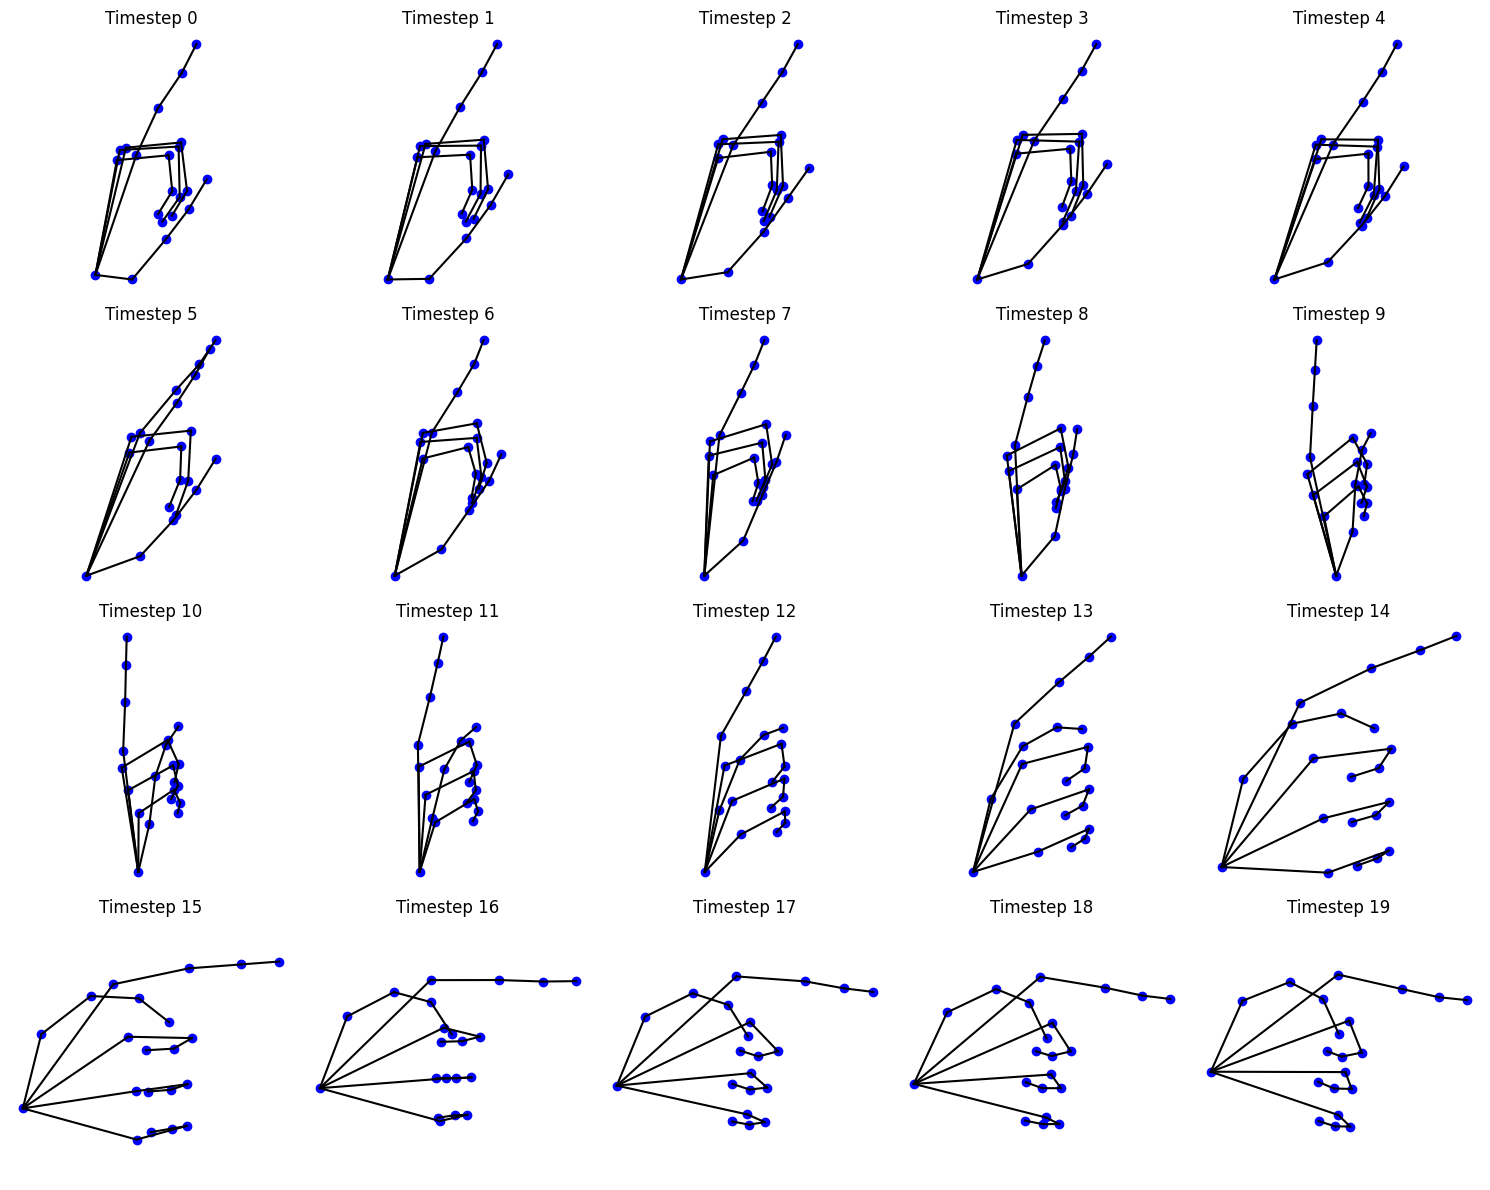

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Struktur sambungan tangan kiri (MediaPipe Hands)
HAND_CONNECTIONS = [
    (0, 1), (1, 2), (2, 3), (3, 4),        # thumb
    (0, 5), (5, 6), (6, 7), (7, 8),        # index
    (0, 9), (9,10), (10,11), (11,12),      # middle
    (0,13), (13,14), (14,15), (15,16),     # ring
    (0,17), (17,18), (18,19), (19,20)      # pinky
]

# # Baca data
df = pd.read_csv('csv/dinamic/trimmed2.csv')

# Filter data
df_seq = df[(df['sequence'] == 4) & (df['Label'] == 'cepat')].reset_index(drop=True)

# Landmark index
landmarks = list(range(21))
x_cols = [f'Xl{i}' for i in landmarks]
y_cols = [f'Yl{i}' for i in landmarks]

# Plot semua timestep
num_timesteps = len(df_seq)
cols = 5
rows = (num_timesteps + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))

for t in range(num_timesteps):
    ax = axes[t // cols, t % cols]
    row = df_seq.iloc[t]
    
    x = row[x_cols].values
    y = row[y_cols].values
    
    # Gambar titik
    ax.scatter(x, y, color='blue')
    
    # Gambar garis kerangka
    for start, end in HAND_CONNECTIONS:
        ax.plot([x[start], x[end]], [y[start], y[end]], color='black')
    
    ax.set_title(f"Timestep {t}")
    ax.invert_yaxis()
    ax.axis('equal')
    ax.axis('off')

# Sembunyikan subplot kosong jika ada
for i in range(num_timesteps, rows * cols):
    fig.delaxes(axes[i // cols, i % cols])

plt.tight_layout()
plt.show()


In [31]:

# === Output Lists ===
output_mlp = ['cepat1','paham1','tidak','lihat1','menang1','z','10_1','i','k']
output_mlp2 = ['cepat2','paham2','tidak','lihat2','menang2','z','10_2','j2','k']
nGSP= list(set(output_mlp + output_mlp2))
output_lstm = ['cepat','paham','tidak','lihat','menang','z','10','j','kita']

import pickle
with open('csv/label map/static.pkl', 'rb') as f:
    label_map_static = pickle.load(f)
for key, value in label_map_static.items():
    if value == 'tidak1':
        label_map_static[key] = 'tidak'
    elif value == 'koma':
        label_map_static[key] = ','
    elif value == 'titik':
        label_map_static[key] = '.'
reGSP = []
pGSP = [item for item in list(label_map_static.values()) if item not in output_mlp and item not in output_mlp2]
for i in range(min(len(output_mlp), len(output_mlp2), len(output_lstm))):
    if output_mlp[i] == output_mlp2[i] and output_mlp[i] != output_lstm[i]:
        reGSP.append(output_mlp[i])

print("re-GSP:", reGSP)
SYM = []

# Gunakan panjang list terpendek untuk menghindari IndexError
for i in range(min(len(output_mlp), len(output_mlp2), len(output_lstm))):
    if output_mlp[i] == output_mlp2[i] == output_lstm[i]:
        SYM.append(output_mlp[i])

rSTA = [item for item in output_mlp if not item.endswith('1') and item not in SYM and item not in reGSP]
rSTA+reGSP

re-GSP: ['k']


['i', 'k']

In [32]:
nGSP

['i',
 'lihat1',
 'z',
 'k',
 'paham2',
 '10_1',
 'menang2',
 'j2',
 'lihat2',
 'menang1',
 '10_2',
 'cepat1',
 'paham1',
 'tidak',
 'cepat2']

In [27]:
pd.read_csv('csv/dinamic/trimmed2.csv')

,Xl0,Xl1,Xl2,Xl3,Xl4,Xl5,Xl6,Xl7,Xl8,Xl9,...,Yh1,Xh2,Yh2,Xh3,Yh3,Xh4,Yh4,timestep,sequence,Label
0,0.383119,0.445331,0.500469,0.520651,0.517050,0.479480,0.494764,0.476847,0.467456,0.446995,...,73.0,536.0,73.0,365.0,244.0,536.0,244.0,0,0,10
1,0.386257,0.446978,0.501256,0.519705,0.513230,0.477312,0.495007,0.479014,0.469289,0.447249,...,73.0,535.0,73.0,365.0,243.0,535.0,243.0,1,0,10
2,0.388777,0.448775,0.501020,0.520043,0.513096,0.475181,0.493057,0.477718,0.467888,0.445307,...,71.0,535.0,71.0,366.0,240.0,535.0,240.0,2,0,10
3,0.389063,0.448350,0.500634,0.518551,0.513166,0.474609,0.494166,0.476996,0.467205,0.444463,...,75.0,533.0,75.0,367.0,240.0,533.0,240.0,3,0,10
4,0.388085,0.448110,0.498691,0.515584,0.511729,0.472919,0.492976,0.477960,0.466615,0.441893,...,77.0,531.0,77.0,368.0,241.0,531.0,241.0,4,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,0.382983,0.418968,0.452088,0.472696,0.468775,0.409499,0.436233,0.444104,0.438964,0.372344,...,183.0,546.0,183.0,368.0,361.0,546.0,361.0,15,111,z
20156,0.369750,0.405832,0.438993,0.442612,0.422704,0.388213,0.410887,0.418585,0.411811,0.349412,...,185.0,549.0,185.0,369.0,365.0,549.0,365.0,16,111,z
20157,0.349008,0.381834,0.413580,0.399828,0.367091,0.365001,0.358062,0.341140,0.318311,0.323924,...,185.0,548.0,185.0,369.0,364.0,548.0,364.0,17,111,z
20158,0.333212,0.365696,0.393116,0.369421,0.336305,0.344182,0.330486,0.309365,0.283213,0.300639,...,187.0,548.0,187.0,370.0,365.0,548.0,365.0,18,111,z


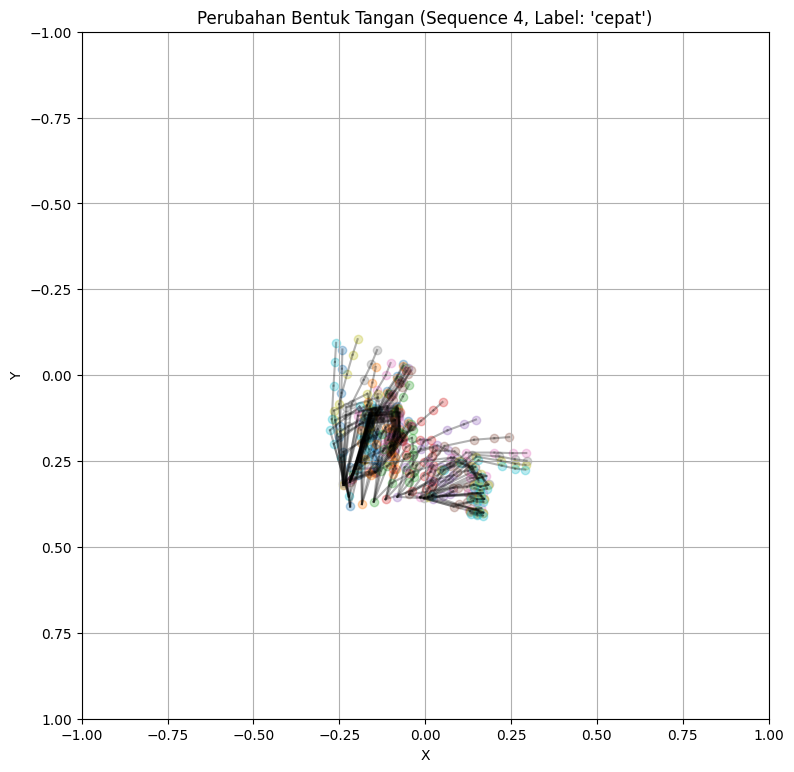

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Struktur sambungan tangan kiri (MediaPipe Hands)
HAND_CONNECTIONS = [
    (0, 1), (1, 2), (2, 3), (3, 4),        # thumb
    (0, 5), (5, 6), (6, 7), (7, 8),        # index
    (0, 9), (9,10), (10,11), (11,12),      # middle
    (0,13), (13,14), (14,15), (15,16),     # ring
    (0,17), (17,18), (18,19), (19,20)      # pinky
]

# Baca data
df = pd.read_csv('csv/dinamic/trimmed2.csv')

# Filter sequence dan label
df_seq = df[(df['sequence'] == 4) & (df['Label'] == 'cepat')].reset_index(drop=True)

# Kolom koordinat
landmarks = list(range(21))
x_cols = [f'Xl{i}' for i in landmarks]
y_cols = [f'Yl{i}' for i in landmarks]

# Buat plot
plt.figure(figsize=(8, 8))

for t in range(len(df_seq)):
    row = df_seq.iloc[t]
    x = row[x_cols].values
    y = row[y_cols].values

    # Gambar kerangka tangan
    for start, end in HAND_CONNECTIONS:
        plt.plot([x[start], x[end]], [y[start], y[end]], color='black', alpha=0.3)

    # Gambar titik
    plt.scatter(x, y, label=f'Timestep {t}', alpha=0.3)

# Set batas dan format plot
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
plt.title("Perubahan Bentuk Tangan (Sequence 4, Label: 'cepat')")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
df

,Xl0,Xl1,Xl2,Xl3,Xl4,Xl5,Xl6,Xl7,Xl8,Xl9,...,Yh1,Xh2,Yh2,Xh3,Yh3,Xh4,Yh4,timestep,sequence,Label
0,0.261263,0.309175,0.324064,0.314881,0.303523,0.282618,0.272407,0.261084,0.247024,0.251937,...,85,476,85,327,234,476,234,0,0,tidak
1,0.256268,0.301409,0.317807,0.309126,0.300076,0.274713,0.266044,0.254973,0.242604,0.244454,...,84,476,84,326,235,476,235,1,0,tidak
2,0.255781,0.301349,0.318845,0.308827,0.298575,0.271760,0.263666,0.253942,0.243454,0.242199,...,84,477,84,324,237,477,237,2,0,tidak
3,0.255748,0.300245,0.315722,0.307837,0.297831,0.270587,0.262181,0.252463,0.241883,0.241554,...,85,478,85,324,238,478,238,3,0,tidak
4,0.257847,0.302374,0.321149,0.310597,0.300013,0.271836,0.264717,0.254867,0.243877,0.242326,...,86,477,86,324,239,477,239,4,0,tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.262007,0.289915,0.293751,0.279556,0.260093,0.246375,0.226081,0.209290,0.192539,0.220900,...,85,470,85,318,238,470,238,15,4,tidak
96,0.264928,0.302976,0.316876,0.307191,0.288895,0.280610,0.264833,0.249806,0.234699,0.254022,...,81,473,81,319,234,473,234,16,4,tidak
97,0.263397,0.307947,0.335758,0.344252,0.331250,0.310336,0.307344,0.298115,0.286889,0.284083,...,83,475,83,321,237,475,237,17,4,tidak
98,0.284114,0.336186,0.374346,0.385433,0.385539,0.362347,0.371293,0.370801,0.367402,0.336825,...,82,474,82,325,230,474,230,18,4,tidak


In [18]:
df.sequence.unique().shape

(24,)

In [17]:
max_val-1

39

## Mengurangi 1 baris


In [23]:
df = df[df['sequence'] != max_val-1]
df.to_csv(src2, index=False)



In [2]:
import pandas as pd
pd.read_csv('csv_separated/dinamic/trim/cepat2.csv')

,Xl0,Xl1,Xl2,Xl3,Xl4,Xl5,Xl6,Xl7,Xl8,Xl9,...,Yh1,Xh2,Yh2,Xh3,Yh3,Xh4,Yh4,timestep,sequence,Label
0,0.324711,0.366877,0.397853,0.420214,0.440252,0.374177,0.398383,0.419149,0.432626,0.357431,...,156,392,156,254,294,392,294,0,0,cepat
1,0.317194,0.365539,0.399975,0.423123,0.441484,0.376266,0.400792,0.420684,0.434073,0.359745,...,158,389,158,254,293,389,293,1,0,cepat
2,0.318558,0.368502,0.402298,0.426371,0.448315,0.374567,0.401056,0.422238,0.436336,0.357464,...,158,390,158,254,293,390,293,2,0,cepat
3,0.313264,0.368050,0.403420,0.426971,0.448172,0.375822,0.402686,0.424792,0.439874,0.358644,...,157,393,157,255,296,393,296,3,0,cepat
4,0.314856,0.369331,0.404450,0.428545,0.450860,0.376550,0.404182,0.425984,0.440713,0.359504,...,157,394,157,254,297,394,297,4,0,cepat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,0.568552,0.596370,0.637429,0.667222,0.685685,0.670389,0.718436,0.745724,0.766628,0.679105,...,195,409,195,280,325,409,325,15,110,cepat
2216,0.568102,0.595055,0.636225,0.666534,0.685108,0.669719,0.717290,0.744446,0.765422,0.678490,...,193,413,193,280,326,413,326,16,110,cepat
2217,0.570557,0.598591,0.639046,0.667137,0.683707,0.670600,0.717331,0.743590,0.763801,0.678818,...,193,413,193,279,327,413,327,17,110,cepat
2218,0.570716,0.597719,0.637569,0.664884,0.680686,0.670189,0.716169,0.742488,0.762862,0.678409,...,193,413,193,279,328,413,328,18,110,cepat


In [28]:
df[df['sequence']==0]

,Xl0,Xl1,Xl2,Xl3,Xl4,Xl5,Xl6,Xl7,Xl8,Xl9,...,Yh1,Xh2,Yh2,Xh3,Yh3,Xh4,Yh4,timestep,sequence,Label
0,0.348609,0.403447,0.435088,0.462515,0.488943,0.402234,0.436150,0.458118,0.473081,0.384715,...,115,413,115,257,270,413,270,0,0,cepat
1,0.332322,0.399267,0.433875,0.462890,0.488828,0.399102,0.436659,0.459077,0.474698,0.385894,...,114,415,114,258,271,415,271,1,0,cepat
2,0.325493,0.392510,0.429865,0.462060,0.491090,0.398202,0.438293,0.462109,0.478724,0.384267,...,114,416,114,261,269,416,269,2,0,cepat
3,0.322964,0.391229,0.431418,0.464041,0.493394,0.398042,0.439703,0.464160,0.481955,0.384283,...,112,416,112,263,266,416,266,3,0,cepat
4,0.320463,0.392139,0.431787,0.464216,0.493035,0.393596,0.436956,0.462585,0.480372,0.380877,...,113,420,113,263,270,420,270,4,0,cepat
5,0.311530,0.381395,0.416358,0.443041,0.469724,0.359420,0.403025,0.429655,0.441085,0.350310,...,111,423,111,258,275,423,275,5,0,cepat
6,0.303808,0.369927,0.397148,0.419477,0.439498,0.334690,0.366669,0.388489,0.401833,0.322217,...,114,423,114,261,276,423,276,6,0,cepat
7,0.293049,0.334420,0.340690,0.350397,0.361600,0.254786,0.258337,0.270787,0.282576,0.247579,...,112,422,112,258,276,422,276,7,0,cepat
8,0.298404,0.336618,0.353896,0.365653,0.380808,0.292018,0.295554,0.311720,0.331737,0.285989,...,113,421,113,259,274,421,274,8,0,cepat
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,110,417,110,260,267,417,267,9,0,cepat


In [6]:
df['Xr20']

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: Xr20, dtype: float64

In [ ]:
elif key == ord('g'):
        array_spatial = []
        print("▶️ Merekam gesture selama 2 detik...")
        if os.path.exists(src2):
            df1 = pd.read_csv(src2)
            max= df1.sequence.max() + 1
        elif os.path.exists(src):
            df1 = pd.read_csv(src)
            max = df1.sequence.max() + 1
        else:
            print("Kedua file tidak ditemukan.")
            max = 0
        start_time = time.time()
        while time.time() - start_time < 2:
            ret, frame = cap.read()
            if not ret:
                print("❌ Gagal membaca frame.")
                break

            center, face_size = detect_face_mediapipe(frame, face_detect)

            if center:
                # Smoothing
                if prev_center:
                    cx = int(prev_center[0] * (1 - alpha) + center[0] * alpha)
                    cy = int(prev_center[1] * (1 - alpha) + center[1] * alpha)
                    center = (cx, cy)
                prev_center = center

                frame = center_crop_with_padding(frame, center, OUTPUT_SIZE)
                # draw_face_box(frame, face_size, (CENTER_X, CENTER_Y))
            else:
                frame = cv2.resize(frame, OUTPUT_SIZE)
                prev_center = None
            h_frame, w_frame = frame.shape[:2]
            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Hasil proses
            hand_results = hands.process(rgb)
            pose_results = pose.process(rgb)
            # face_mesh_results = face_mesh.process(rgb)
            face_detect_results = face_detect.process(rgb)

            # Hands
            if hand_results.multi_hand_landmarks and hand_results.multi_handedness:
                for i, hand_landmarks in enumerate(hand_results.multi_hand_landmarks):
                    label = hand_results.multi_handedness[i].classification[0].label
                    coords = [(lm.x, lm.y, lm.z) for lm in hand_landmarks.landmark]
                    if label == 'Left':
                        last_data["Xl"] = coords
                    elif label == 'Right':
                        last_data["Xr"] = coords
                    mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Pose
            if pose_results.pose_landmarks:
                landmarks = pose_results.pose_landmarks.landmark
                last_data["Xp"] = [(lm.x, lm.y, lm.z) for lm in landmarks]
                mp_drawing.draw_landmarks(frame, pose_results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            if face_detect_results.detections:
                for detection in face_detect_results.detections:
                    bboxC = detection.location_data.relative_bounding_box
                    draw_face_box(frame, bboxC, (h_frame, w_frame))


In [3]:
pd.read_csv(src2)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Yn14,Yn15,Yn16,Yn17,Yn18,Yn19,Yn20,timestep,sequence,Label
0,0.423715,0.438230,0.478993,0.522289,0.558827,0.483953,0.528529,0.557402,0.579048,0.493424,...,1.951389,2.217722,2.270110,2.248497,2.277374,2.477451,2.532070,0,0,cepat
1,0.423357,0.438967,0.479625,0.522236,0.558633,0.483994,0.528955,0.558077,0.579827,0.494491,...,1.942309,2.213073,2.266858,2.238332,2.265945,2.470932,2.529091,1,0,cepat
2,0.422263,0.438356,0.479412,0.521499,0.558233,0.484451,0.528716,0.557756,0.579602,0.493918,...,1.930146,2.177463,2.220491,2.217239,2.252866,2.446460,2.500233,2,0,cepat
3,0.412701,0.425321,0.463538,0.505411,0.539332,0.468549,0.514630,0.543817,0.564936,0.477108,...,1.933660,2.177398,2.225165,2.181431,2.263626,2.464468,2.517978,3,0,cepat
4,0.397622,0.410151,0.452138,0.500226,0.538042,0.433491,0.467193,0.489191,0.503397,0.438402,...,1.876749,2.125992,2.199365,2.263708,2.202250,2.422083,2.517541,4,0,cepat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,0.460381,0.476498,0.539308,0.602910,0.638545,0.594926,0.681159,0.728411,0.765672,0.606410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,96,cepat
1936,0.460638,0.478786,0.541681,0.604166,0.639509,0.595434,0.681576,0.729306,0.766647,0.608032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,96,cepat
1937,0.463735,0.481346,0.544042,0.605752,0.641630,0.598238,0.683179,0.729796,0.766876,0.610608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,96,cepat
1938,0.463350,0.481126,0.544382,0.605544,0.640350,0.598319,0.682011,0.728411,0.765967,0.610637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,96,cepat


In [29]:
for i, baris in enumerate(trimmed):
    baris[-3] = i  # reset kolom ke-(-3) jadi 0, 1, 2, ..., 19


In [30]:
[baris[-3] for baris in trimmed]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [32]:
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z14,Z15,Z16,Z17,Z18,Z19,Z20,timestep,sequence,Label
0,0.321872,0.376458,0.416865,0.445886,0.473566,0.387879,0.426049,0.453857,0.473462,0.366995,...,-0.073428,-0.060472,-0.044584,-0.059460,-0.074559,-0.061700,-0.048011,0,1,a
1,0.301672,0.368761,0.415265,0.449489,0.481182,0.389781,0.434893,0.463335,0.483268,0.370055,...,-0.069724,-0.057778,-0.044343,-0.060494,-0.076041,-0.065451,-0.054700,1,1,a
2,0.298008,0.369305,0.415128,0.450270,0.482923,0.391104,0.436585,0.463395,0.482415,0.372043,...,-0.067624,-0.054903,-0.042069,-0.061253,-0.074349,-0.062961,-0.052633,2,1,a
3,0.292096,0.366571,0.414212,0.450916,0.484153,0.391150,0.436625,0.463530,0.483026,0.372515,...,-0.066789,-0.054481,-0.041413,-0.061211,-0.074262,-0.063460,-0.053350,3,1,a
4,0.288601,0.364821,0.413976,0.451487,0.485386,0.391338,0.438567,0.465407,0.483825,0.372639,...,-0.067161,-0.054279,-0.041478,-0.062837,-0.074875,-0.063285,-0.053124,4,1,a
5,0.286644,0.361471,0.410900,0.448330,0.482343,0.389549,0.435361,0.462869,0.482130,0.371323,...,-0.062281,-0.051341,-0.040045,-0.057042,-0.068855,-0.057997,-0.048350,5,1,a
6,0.276294,0.348102,0.389321,0.416191,0.440072,0.342145,0.379346,0.399802,0.410841,0.323870,...,-0.059398,-0.049193,-0.038052,-0.053693,-0.065932,-0.055566,-0.045758,6,1,a
7,0.267497,0.337809,0.364515,0.380931,0.397904,0.296792,0.317733,0.333912,0.346341,0.278970,...,-0.074895,-0.062713,-0.047848,-0.062334,-0.076820,-0.064376,-0.052043,7,1,a
8,0.249154,0.295101,0.311297,0.330437,0.352377,0.242896,0.241385,0.252559,0.264115,0.232973,...,-0.096901,-0.083723,-0.068930,-0.086224,-0.101432,-0.087345,-0.074290,8,1,a
9,0.244605,0.285282,0.307462,0.329995,0.357266,0.246798,0.252908,0.265166,0.277908,0.240235,...,-0.081507,-0.071289,-0.061110,-0.077919,-0.086916,-0.074909,-0.065100,9,1,a


In [ ]:
import cv2
import time
import os
from mediapipe.framework.formats import landmark_pb2
import string
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

# Inisialisasi kamera
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Kamera tidak dapat dibuka.")
    exit()

# Inisialisasi model HandLandmarker
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=2,
    running_mode=vision.RunningMode.IMAGE
)
detector = vision.HandLandmarker.create_from_options(options)

# Variabel folder dan target
path = "video"
base_directory = "img"
#askz
#menang2 , paham2 ,  lihat1 ,lihat2,space
# Get list of subfolders, excluding those that start with a dot
allTarget2 = [f for f in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, f)) and not f.startswith('.')]
allTarget2 =['tidak1']
allTarget = [f for f in os.listdir(path) if not f.startswith('.')]

imgLabel = 0
current_directory = os.path.join(base_directory, allTarget2[0])
os.makedirs(current_directory, exist_ok=True)
target_number = 0

# Variables for image adjustment tracking
brightness = 0
contrast = 1.0
detection_stats = {
    'last_detection_time': 0,
    'detection_count': 0,
    'no_detection_count': 0,
    'detection_rate': 0.0
}

def get_latest_video_number(folder):
    folder_path = os.path.join(path, folder)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    videos = [int(f.split('.')[0]) for f in os.listdir(folder_path) if f.endswith('.mp4') and f.split('.')[0].isdigit()]
    return max(videos) + 1 if videos else 1

def last_img(current_directory, base_directory, allTarget2, imgLabel):
    current_directory = os.path.join(base_directory, allTarget2[imgLabel])
    try:
        jpg_files = [f for f in os.listdir(current_directory) if f.endswith('.jpg')]
        sorted_files = [f.split('.')[0] for f in sorted(jpg_files, key=lambda x: int(x.split('.')[0]))]
        last_file = sorted_files[-1] if sorted_files else "0"
        return int(last_file) + 1
    except Exception as e:
        print(f"Error: {e}")
        return 1

def count_hand_landmarks(detection_result):
    return len(detection_result.hand_landmarks) if detection_result and detection_result.hand_landmarks else 0

def calculate_detection_metrics(detection_result):
    current_time = time.time()
    if detection_result and detection_result.hand_landmarks:
        detection_stats['detection_count'] += 1
        detection_stats['last_detection_time'] = current_time
    else:
        detection_stats['no_detection_count'] += 1
    
    total_frames = detection_stats['detection_count'] + detection_stats['no_detection_count']
    if total_frames > 0:
        detection_stats['detection_rate'] = detection_stats['detection_count'] / total_frames

# Visualisasi kerangka tangan
def draw_landmarks(image, detection_result):
    if not detection_result.hand_landmarks:
        return image

    annotated_image = image.copy()
    height, width, _ = image.shape

    # Definisikan connections (struktur tulang tangan)
    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4),        # Ibu jari
        (0, 5), (5, 6), (6, 7), (7, 8),        # Telunjuk
        (0, 9), (9,10), (10,11), (11,12),      # Jari tengah
        (0,13), (13,14), (14,15), (15,16),     # Jari manis
        (0,17), (17,18), (18,19), (19,20),     # Kelingking
        (5, 9), (9,13), (13,17)                # Garis telapak tangan
    ]

    for landmarks in detection_result.hand_landmarks:
        # Gambar garis penghubung
        for connection in connections:
            start_idx, end_idx = connection
            x0, y0 = int(landmarks[start_idx].x * width), int(landmarks[start_idx].y * height)
            x1, y1 = int(landmarks[end_idx].x * width), int(landmarks[end_idx].y * height)
            cv2.line(annotated_image, (x0, y0), (x1, y1), (0, 255, 0), 2)

        # Gambar titik landmark
        for landmark in landmarks:
            cx, cy = int(landmark.x * width), int(landmark.y * height)
            cv2.circle(annotated_image, (cx, cy), 4, (0, 0, 255), -1)

    return annotated_image

def adjust_image_properties(frame, brightness, contrast):
    # Adjust brightness and contrast
    frame = cv2.convertScaleAbs(frame, alpha=contrast, beta=brightness)
    return frame

def display_detection_info(frame, detection_result, brightness, contrast, detection_stats):
    # Display basic info
    info_text = f"Label: {allTarget[target_number]}"
    if last_recorded_file:
        info_text += f" | Last: {last_recorded_file}"
    
    # Display image properties
    info_text += f" | Bright: {brightness} | Contrast: {contrast:.1f}"
    
    # Display detection metrics
    hands_detected = count_hand_landmarks(detection_result)
    info_text += f" | Hands: {hands_detected}"
    info_text += f" | Det. Rate: {detection_stats['detection_rate']*100:.1f}%"
    
    # Display detection tips based on conditions
    if hands_detected == 0:
        if brightness < 0:
            info_text += " | Tip: Increase brightness"
        elif contrast < 1.0:
            info_text += " | Tip: Increase contrast"
    
    # Put all text on frame
    y_offset = 30
    for i, line in enumerate(info_text.split(' | ')):
        cv2.putText(frame, line, (10, y_offset + i*30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)
    
    return frame

video_count = get_latest_video_number(allTarget[target_number])
last_recorded_file = ""
numImg = last_img(current_directory, base_directory, allTarget2, imgLabel)

print("Tekan 'c' untuk menangkap gambar.")
print("Tekan 's' untuk merekam video selama 5 detik.")
print("Tekan 't' untuk video selanjutnya.")
print("Tekan 'p' untuk video sebelumnya.")
print("Tekan 'd' untuk menghapus video saat ini.")
print("Tekan 'q' untuk keluar.")
print("Tekan '+' untuk meningkatkan brightness.")
print("Tekan '-' untuk mengurangi brightness.")
print("Tekan '*' untuk meningkatkan contrast.")
print("Tekan '/' untuk mengurangi contrast.")
src = f'csv_separated/dinamic/filter/cepat.csv'
while True:
    # frame = cv2.imread('242.jpg')
    ret, frame = cap.read()
    if not ret:
        print("Gagal membaca frame.")
        break

    # Apply brightness and contrast adjustments
    # frame = adjust_image_properties(frame, brightness, contrast)
    
    original_frame = frame.copy()  # Simpan salinan frame asli untuk disimpan
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
    detection_result = detector.detect(mp_image)
    
    # # Update detection metrics
    # calculate_detection_metrics(detection_result)

    # Tampilkan landmark
    frame = draw_landmarks(frame, detection_result)
    
    # # Display all information
    # frame = display_detection_info(frame, detection_result, brightness, contrast, detection_stats)

    cv2.imshow("Hand Landmark Detection", frame)
    key = cv2.waitKey(1) & 0xFF

    folder_path = os.path.join(path, allTarget[target_number])
    video_path = os.path.join(folder_path, f"{video_count}.mp4")

    if key == ord('n'):
        target_number = (target_number + 1) % len(allTarget)
        print(f"Label berikutnya: {allTarget[target_number]}")
        src = f'csv_separated/dinamic/filter/{allTarget[target_number]}.csv'
        video_count = get_latest_video_number(allTarget[target_number])

    elif key == ord('m'):
        target_number = (target_number - 1) % len(allTarget)
        print(f"Label sebelumnya: {allTarget[target_number]}")
        video_count = get_latest_video_number(allTarget[target_number])

    elif key == ord('t'):
        if os.path.exists(os.path.join(folder_path, f"{video_count + 1}.mp4")):
            video_count += 1
            print(f"Nama file berikutnya: {video_count}.mp4")
        else:
            print("Tidak ada video berikutnya.")

    elif key == ord('p'):
        if video_count > 1 and os.path.exists(os.path.join(folder_path, f"{video_count - 1}.mp4")):
            video_count -= 1
            print(f"Nama file sebelumnya: {video_count}.mp4")
        else:
            print("Tidak ada video sebelumnya.")

    elif key == ord('b'):
        imgLabel = (imgLabel + 1) % len(allTarget2)
        current_directory = os.path.join(base_directory, allTarget2[imgLabel])
        os.makedirs(current_directory, exist_ok=True)
        print(f"LABEL = {allTarget2[imgLabel]}")

    elif key == ord('h'):
        imgLabel = (imgLabel - 1) % len(allTarget2)
        current_directory = os.path.join(base_directory, allTarget2[imgLabel])
        os.makedirs(current_directory, exist_ok=True)
        print(f"LABEL = {allTarget2[imgLabel]}")

    elif key == ord('c'):
        numImg = last_img(current_directory, base_directory, allTarget2, imgLabel)
        filename = os.path.join(current_directory, f"{numImg}.jpg")
        cv2.imwrite(filename, original_frame)  # Simpan gambar asli
        numImg += 1
        print(f"Gambar telah disimpan sebagai {filename}")

    elif key == ord('s'):
        video_count = get_latest_video_number(allTarget[target_number])
        filename = os.path.join(folder_path, f"{video_count}.mp4")
        print(f"Merekam video selama 5 detik... Simpan sebagai {filename}")

        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(filename, fourcc, 20.0, (640, 480))

        start_time = time.time()
        hand_landmark_count = 0

        while time.time() - start_time < 2:
            ret, frame = cap.read()
            if not ret:
                print("Gagal membaca frame.")
                break
            frame = adjust_image_properties(frame, brightness, contrast)
            original_frame = frame.copy()
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
            detection_result = detector.detect(mp_image)

            # Tampilkan landmark
            frame = draw_landmarks(frame, detection_result)
            frame = display_detection_info(frame, detection_result, brightness, contrast, detection_stats)

            hand_landmark_count += count_hand_landmarks(detection_result)
            elapsed_time = round(time.time() - start_time, 1)
            cv2.putText(frame, f"Recording: {elapsed_time:.1f}s", (10, 120),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
            out.write(original_frame)
            cv2.imshow("Merekam... Tekan 'q' untuk keluar", frame)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        out.release()
        print(hand_landmark_count)
        if hand_landmark_count < 20:
            os.remove(filename)
            print("Video tidak disimpan karena jumlah hand landmarks kurang dari 50.")
        else:
            print(f"Video telah disimpan sebagai {filename}")
            last_recorded_file = f"{video_count}.mp4"

    elif key == ord('d'):
        if os.path.exists(video_path):
            os.remove(video_path)
            print(f"File {video_path} telah dihapus.")
            video_count = get_latest_video_number(allTarget[target_number])
        else:
            print("File tidak ditemukan.")

    # if key == ord('k'):
    #     brightness += 5
    #     print(f"Brightness increased to {brightness}")
        

    # elif key == ord('l'):
    #     brightness -= 5
    #     print(f"Brightness decreased to {brightness}")

    # elif key == ord('o'):
    #     contrast += 0.1
    #     print(f"Contrast increased to {contrast:.1f}")

    # elif key == ord('p'):
    #     contrast = max(0.1, contrast - 0.1)
    #     print(f"Contrast decreased to {contrast:.1f}")

    elif key == ord('q'):
        print("Menutup program...")
        break

cap.release()
cv2.destroyAllWindows()

I0000 00:00:1749224919.560666    7040 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1749224919.565304    7619 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
W0000 00:00:1749224919.623132    7626 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1749224919.669322    7634 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Tekan 'c' untuk menangkap gambar.
Tekan 's' untuk merekam video selama 5 detik.
Tekan 't' untuk video selanjutnya.
Tekan 'p' untuk video sebelumnya.
Tekan 'd' untuk menghapus video saat ini.
Tekan 'q' untuk keluar.
Tekan '+' untuk meningkatkan brightness.
Tekan '-' untuk mengurangi brightness.
Tekan '*' untuk meningkatkan contrast.
Tekan '/' untuk mengurangi contrast.
Brightness increased to 5
Brightness increased to 10
Brightness increased to 15
Brightness increased to 20
Brightness increased to 25
Brightness increased to 30
Contrast increased to 1.1
Contrast increased to 1.2
Contrast increased to 1.3
Brightness increased to 35
Brightness increased to 40
Brightness increased to 45
Brightness increased to 50
Brightness increased to 55
Brightness increased to 60
Brightness increased to 65
Brightness increased to 70
Contrast increased to 1.4
Brightness decreased to 65
Brightness decreased to 60
Brightness decreased to 55
Brightness decreased to 50
Brightness decreased to 45
Brightness de

In [5]:
import cv2
import mediapipe as mp
import numpy as np

# Inisialisasi MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2,
                       min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Webcam
cap = cv2.VideoCapture(0)

# Nilai awal brightness & contrast
brightness = 0
contrast = 1.0

# Mode aktif
modes = ["ALL", "INNER", "OUTER"]
mode_index = 0
current_mode = modes[mode_index]

def apply_adjustment(image, mask, mode, alpha, beta):
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    if mode == "ALL":
        return adjusted
    elif mode == "INNER":
        output = image.copy()
        output[mask == 255] = adjusted[mask == 255]
        return output
    elif mode == "OUTER":
        output = image.copy()
        output[mask == 0] = adjusted[mask == 0]
        return output

while True:
    ret, frame = cap.read()
    if not ret:
        break

  
    h, w, _ = frame.shape

    # Terapkan brightness & contrast sebelum deteksi
    preprocessed = cv2.convertScaleAbs(frame, alpha=contrast, beta=brightness)

    # Konversi ke RGB
    rgb = cv2.cvtColor(preprocessed, cv2.COLOR_BGR2RGB)

    # Konversi ke grayscale sebelum equalizeHist
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    equalized = cv2.equalizeHist(gray)

    # Konversi kembali ke RGB (karena MediaPipe membutuhkan input 3-channel)
    rgb_equalized = cv2.cvtColor(equalized, cv2.COLOR_GRAY2RGB)
    result = hands.process(rgb_equalized)


    # Mask hitam (0 = luar, 255 = dalam)
    mask = np.zeros((h, w), dtype=np.uint8)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # Ambil koordinat x, y
            x_list = [lm.x for lm in hand_landmarks.landmark]
            y_list = [lm.y for lm in hand_landmarks.landmark]

            # Hitung bounding box awal
            x_min = int(min(x_list) * w)
            x_max = int(max(x_list) * w)
            y_min = int(min(y_list) * h)
            y_max = int(max(y_list) * h)

            # Tambahkan padding proporsional
            box_width = x_max - x_min
            box_height = y_max - y_min
            padding_x = int(box_width * 0.25)
            padding_y = int(box_height * 0.2)

            # Koreksi agar tidak keluar frame
            x_min = max(0, x_min - padding_x)
            x_max = min(w, x_max + padding_x)
            y_min = max(0, y_min - padding_y)
            y_max = min(h, y_max + padding_y)

            # Gambar bounding box & landmark
            cv2.rectangle(preprocessed, (x_min, y_min), (x_max, y_max), (0, 255, 255), 2)
            mp_drawing.draw_landmarks(preprocessed, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Tambahkan ke mask
            cv2.rectangle(mask, (x_min, y_min), (x_max, y_max), 255, -1)

    # Terapkan brightness/contrast berdasarkan mode
    final = apply_adjustment(preprocessed, mask, current_mode, contrast, brightness)

    # Info tampilan
    cv2.putText(final, f"Mode: {current_mode}", (10, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (233, 25, 5), 2)
    cv2.putText(final, f"Brightness: {brightness}  Contrast: {contrast:.1f}", (10, 55),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)

    cv2.imshow("MediaPipe Hand Detection - ROI Control", final)

    # Keyboard kontrol
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # ESC
        break
    elif key == ord('m'):
        mode_index = (mode_index + 1) % len(modes)
        current_mode = modes[mode_index]
    elif key == ord('w'):
        brightness += 10
    elif key == ord('s'):
        brightness -= 10
    elif key == ord('e'):
        contrast += 0.1
    elif key == ord('d'):
        contrast = max(0.1, contrast - 0.1)

cap.release()
cv2.destroyAllWindows()


I0000 00:00:1749226489.954180   10178 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1749226489.958756   11260 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
W0000 00:00:1749226490.007258   11231 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1749226490.036879   11254 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [6]:
import cv2
import numpy as np

def detect_hand_edges(frame):
    # Konversi ke grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Blur untuk mengurangi noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Threshold adaptif untuk berbagai kondisi pencahayaan
    thresh = cv2.adaptiveThreshold(blurred, 255, 
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                  cv2.THRESH_BINARY_INV, 11, 2)
    
    # Temukan kontur
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter kontur berdasarkan area (abaikan yang terlalu kecil)
    hand_contours = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 5000:  # Ubah nilai ini sesuai kebutuhan
            hand_contours.append(cnt)
    
    return hand_contours

def draw_hand_edges(frame, contours):
    # Gambar semua kontur yang terdeteksi
    for cnt in contours:
        # Gambar garis tepi
        cv2.drawContours(frame, [cnt], -1, (0, 255, 0), 2)
        
        # Gambar convex hull (garis luar)
        hull = cv2.convexHull(cnt)
        cv2.drawContours(frame, [hull], -1, (0, 0, 255), 2)
        
        # Gambar bounding rectangle
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Flip horizontal untuk mirror effect
    frame = cv2.flip(frame, 1)
    
    # Deteksi tepi tangan
    hand_contours = detect_hand_edges(frame)
    
    # Gambar hasil deteksi
    if len(hand_contours) > 0:
        draw_hand_edges(frame, hand_contours)
    
    # Tampilkan instruksi
    cv2.putText(frame, "Tekan 'q' untuk keluar", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    
    cv2.imshow('Deteksi Tangan', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [12]:
import cv2
import mediapipe as mp
import numpy as np

# Inisialisasi MediaPipe
mp_face_detection = mp.solutions.face_detection

# Ukuran output crop tetap
CROP_WIDTH = 400
CROP_HEIGHT = 400

# Buka kamera
cap = cv2.VideoCapture(0)
success, frame = cap.read()
if not success:
    print("Tidak dapat mengakses kamera.")
    exit()

frame_height, frame_width, _ = frame.shape

with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5) as face_detection:
    while True:
        success, frame = cap.read()
        if not success:
            break

        # Konversi ke RGB untuk MediaPipe
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_detection.process(rgb_frame)

        if results.detections:
            detection = results.detections[0]
            bbox = detection.location_data.relative_bounding_box

            # Hitung pusat wajah dalam koordinat asli frame
            center_x = int((bbox.xmin + bbox.width / 2) * frame_width)
            center_y = int((bbox.ymin + bbox.height / 2) * frame_height)

            # Tentukan area crop agar wajah di tengah
            x1 = center_x - CROP_WIDTH // 2
            y1 = center_y - CROP_HEIGHT // 2
            x2 = x1 + CROP_WIDTH
            y2 = y1 + CROP_HEIGHT

            # Batasi agar tidak keluar frame
            x1 = max(0, min(x1, frame_width - CROP_WIDTH))
            y1 = max(0, min(y1, frame_height - CROP_HEIGHT))
            x2 = x1 + CROP_WIDTH
            y2 = y1 + CROP_HEIGHT

            # Crop dan tampilkan
            cropped = frame[y1:y2, x1:x2].copy()

            # Gambar kotak wajah relatif terhadap crop
            face_box_x = int(bbox.xmin * frame_width) - x1
            face_box_y = int(bbox.ymin * frame_height) - y1
            face_box_w = int(bbox.width * frame_width)
            face_box_h = int(bbox.height * frame_height)

            cv2.rectangle(cropped,
                          (face_box_x, face_box_y),
                          (face_box_x + face_box_w, face_box_y + face_box_h),
                          (0, 255, 0), 2)

            # Tampilkan hasil
            cv2.imshow('Face Centered Tracking', cropped)
        else:
            # Jika tidak ada wajah, tampilkan fallback crop tengah
            center_x = frame_width // 2
            center_y = frame_height // 2
            x1 = center_x - CROP_WIDTH // 2
            y1 = center_y - CROP_HEIGHT // 2
            fallback_crop = frame[y1:y1+CROP_HEIGHT, x1:x1+CROP_WIDTH]
            cv2.imshow('Face Centered Tracking', fallback_crop)

        if cv2.waitKey(1) & 0xFF == 27:
            break

cap.release()
cv2.destroyAllWindows()


I0000 00:00:1749195920.263967    6060 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1749195920.265944   36221 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
W0000 00:00:1749195920.269102   36213 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [ ]:
import os

# Path ke folder img
folder_path = "img"

# Ambil semua file .jpg yang langsung cberada di dalam folder img
jpg_files = [f for f in os.listdir(folder_path) 
             if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith('.jpg')]

# Urutkan untuk menjaga konsistensi penomoran
jpg_files.sort()

# Rename dimulai dari 201
start_number = 201

for index, filename in enumerate(jpg_files):
    old_path = os.path.join(folder_path, filename)
    new_filename = f"{start_number + index}.jpg"
    new_path = os.path.join(folder_path, new_filename)
    
    os.rename(old_path, new_path)
    print(f"Renamed: {filename} -> {new_filename}")


Renamed: 154.jpg -> 201.jpg
Renamed: 155.jpg -> 202.jpg
Renamed: 156.jpg -> 203.jpg
Renamed: 157.jpg -> 204.jpg
Renamed: 158.jpg -> 205.jpg
Renamed: 159.jpg -> 206.jpg
Renamed: 160.jpg -> 207.jpg
Renamed: 161.jpg -> 208.jpg
Renamed: 162.jpg -> 209.jpg
Renamed: 163.jpg -> 210.jpg
Renamed: 164.jpg -> 211.jpg
Renamed: 165.jpg -> 212.jpg
Renamed: 166.jpg -> 213.jpg
Renamed: 167.jpg -> 214.jpg
Renamed: 168.jpg -> 215.jpg
Renamed: 169.jpg -> 216.jpg
Renamed: 170.jpg -> 217.jpg
Renamed: 171.jpg -> 218.jpg
Renamed: 172.jpg -> 219.jpg
Renamed: 173.jpg -> 220.jpg
Renamed: 174.jpg -> 221.jpg
Renamed: 175.jpg -> 222.jpg
Renamed: 176.jpg -> 223.jpg
Renamed: 177.jpg -> 224.jpg
Renamed: 178.jpg -> 225.jpg
Renamed: 179.jpg -> 226.jpg
Renamed: 180.jpg -> 227.jpg
Renamed: 181.jpg -> 228.jpg
Renamed: 182.jpg -> 229.jpg
Renamed: 183.jpg -> 230.jpg


In [4]:
import cv2
import mediapipe as mp
import numpy as np
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
def reduce_noise(image):
    return cv2.GaussianBlur(image, (3, 3), 0)

class LandmarkKalmanFilter:
    def __init__(self):
        self.kalman = cv2.KalmanFilter(4, 2)
        self.kalman.measurementMatrix = np.array([[1,0,0,0],[0,1,0,0]], np.float32)
        self.kalman.transitionMatrix = np.array([[1,0,1,0],
                                                 [0,1,0,1],
                                                 [0,0,1,0],
                                                 [0,0,0,1]], np.float32)
        self.kalman.processNoiseCov = np.eye(4, dtype=np.float32) * 0.03

    def predict(self, coordX, coordY):
        measurement = np.array([[np.float32(coordX)], [np.float32(coordY)]])
        self.kalman.correct(measurement)
        prediction = self.kalman.predict()
        return prediction[0], prediction[1]

kf = LandmarkKalmanFilter()

# Fungsi Preprocessing Jelas
def preprocess(image):
    image = enhance_clahe(image)
    image = reduce_noise(image)
    return image

# Setup Model Hand Landmark
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=2,
    running_mode=vision.RunningMode.IMAGE
)
detector = vision.HandLandmarker.create_from_options(options)

# Kamera Setup (resolusi tinggi agar lebih jelas)
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

kf = LandmarkKalmanFilter()

while True:
    ret, frame = cap.read()
    if not ret:
        continue
    
    # Preprocessing jelas
    processed_frame = preprocess(frame)

    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=processed_frame)
    result = detector.detect(mp_image)

    if result.hand_landmarks:
        for landmark in result.hand_landmarks[0]:
            h, w, _ = processed_frame.shape
            cx, cy = int(landmark.x * w), int(landmark.y * h)
            
            # Kalman Filter diterapkan untuk kestabilan
            pred_x, pred_y = kf.predict(cx, cy)
            cv2.circle(processed_frame, (int(pred_x), int(pred_y)), 5, (0,255,0), -1)
    else:
        cv2.putText(processed_frame, "Landmark Tidak Terdeteksi", (30,30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    cv2.imshow('Enhanced MediaPipe Prediction', processed_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


I0000 00:00:1746631665.188220   51202 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1746631665.190069   51549 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
W0000 00:00:1746631665.210915   51553 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1746631665.227515   51558 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


NameError: name 'enhance_clahe' is not defined

In [7]:
class Halo:
    def __init__(self):
        print("Objek dibuat!")
        self.sapa()  # langsung memanggil method sapa saat objek dibuat

    def sapa(self):
        print("Halo! Ini method sapa() yang langsung jalan dari __init__.")

# Membuat objek
obj = Halo()


Objek dibuat!
Halo! Ini method sapa() yang langsung jalan dari __init__.


In [1]:
import threading
import time

def crawl(link, delay=3):
    print(f"crawl started for {link}")
    time.sleep(delay)  # Blocking I/O (simulating a network request)
    print(f"crawl ended for {link}")

links = [
    "https://python.org",
    "https://docs.python.org",
    "https://peps.python.org",
]

# Start threads for each link
threads = []
for link in links:
    # Using `args` to pass positional arguments and `kwargs` for keyword arguments
    t = threading.Thread(target=crawl, args=(link,), kwargs={"delay": 2})
    threads.append(t)

# Start each thread
for t in threads:
    t.start()

# Wait for all threads to finish
for t in threads:
    t.join()

crawl started for https://python.org
crawl started for https://docs.python.org
crawl started for https://peps.python.org
crawl ended for https://python.org
crawl ended for https://docs.python.org
crawl ended for https://peps.python.org
